In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from cycler import cycler

In [3]:
plt.style.use("fivethirtyeight")
rcParams['figure.figsize'] = 15,5
rcParams['axes.prop_cycle'] = cycler(color=['#4d52e3'])
rcParams['lines.linewidth'] = 2.5
rcParams['figure.dpi'] = 200

### Data Source : 

https://trends.google.com/trends/explore?date=all&q=diet

## Read & Parse data as Time Series 

In [4]:
df_diet = pd.read_csv("02 GTrend diet monthly.csv", parse_dates=["Month"], index_col=["Month"])

In [5]:
df_diet.columns = ["diet search"]

## VISUALIZING THE TIME SERIES

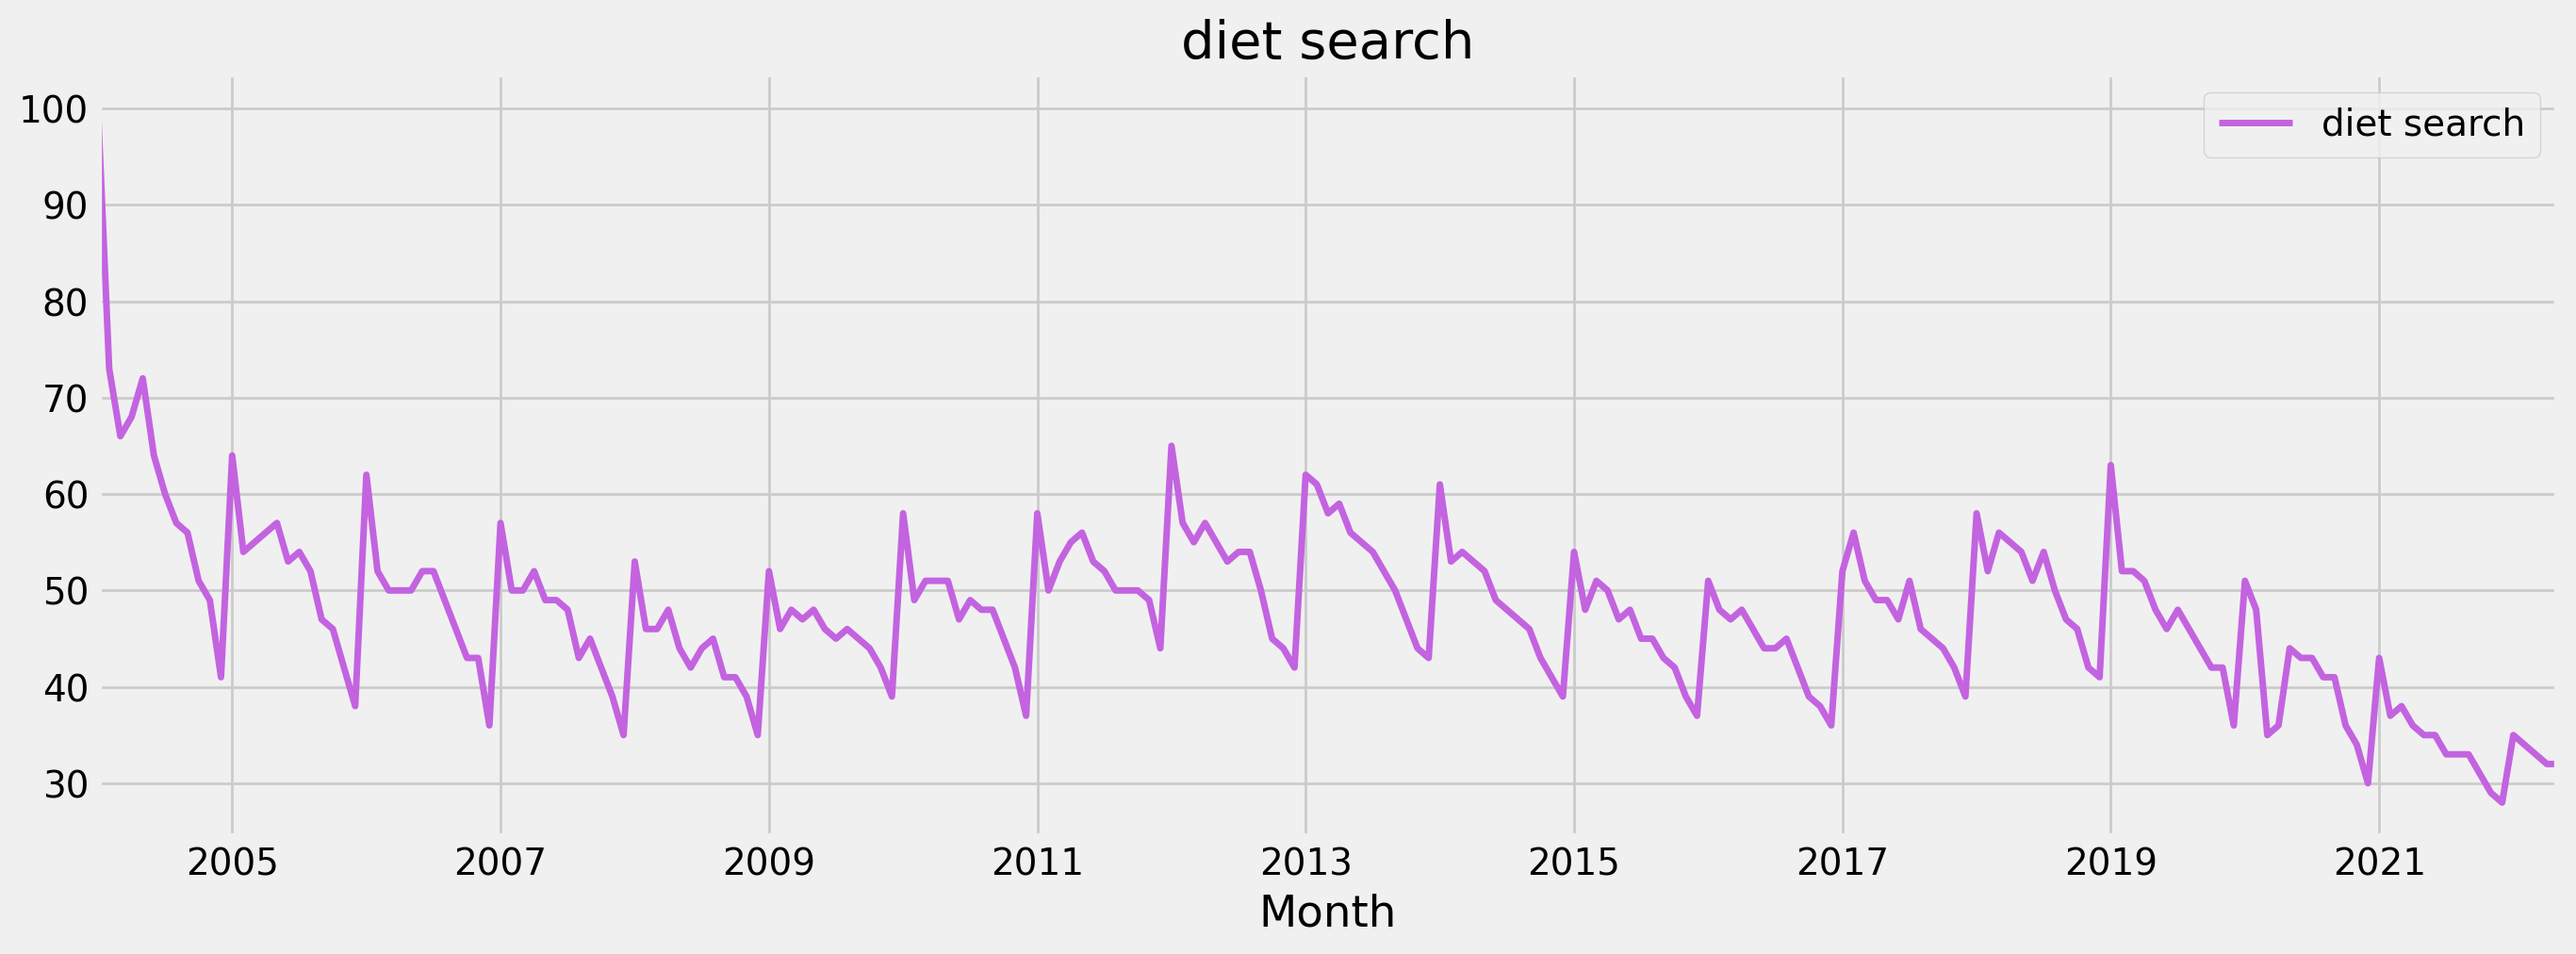

In [6]:
df_diet.plot(color='#c363e0',title = "diet search");

## SEASONAL DECOMPOSE

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
diet_decomp = seasonal_decompose(df_diet["diet search"])

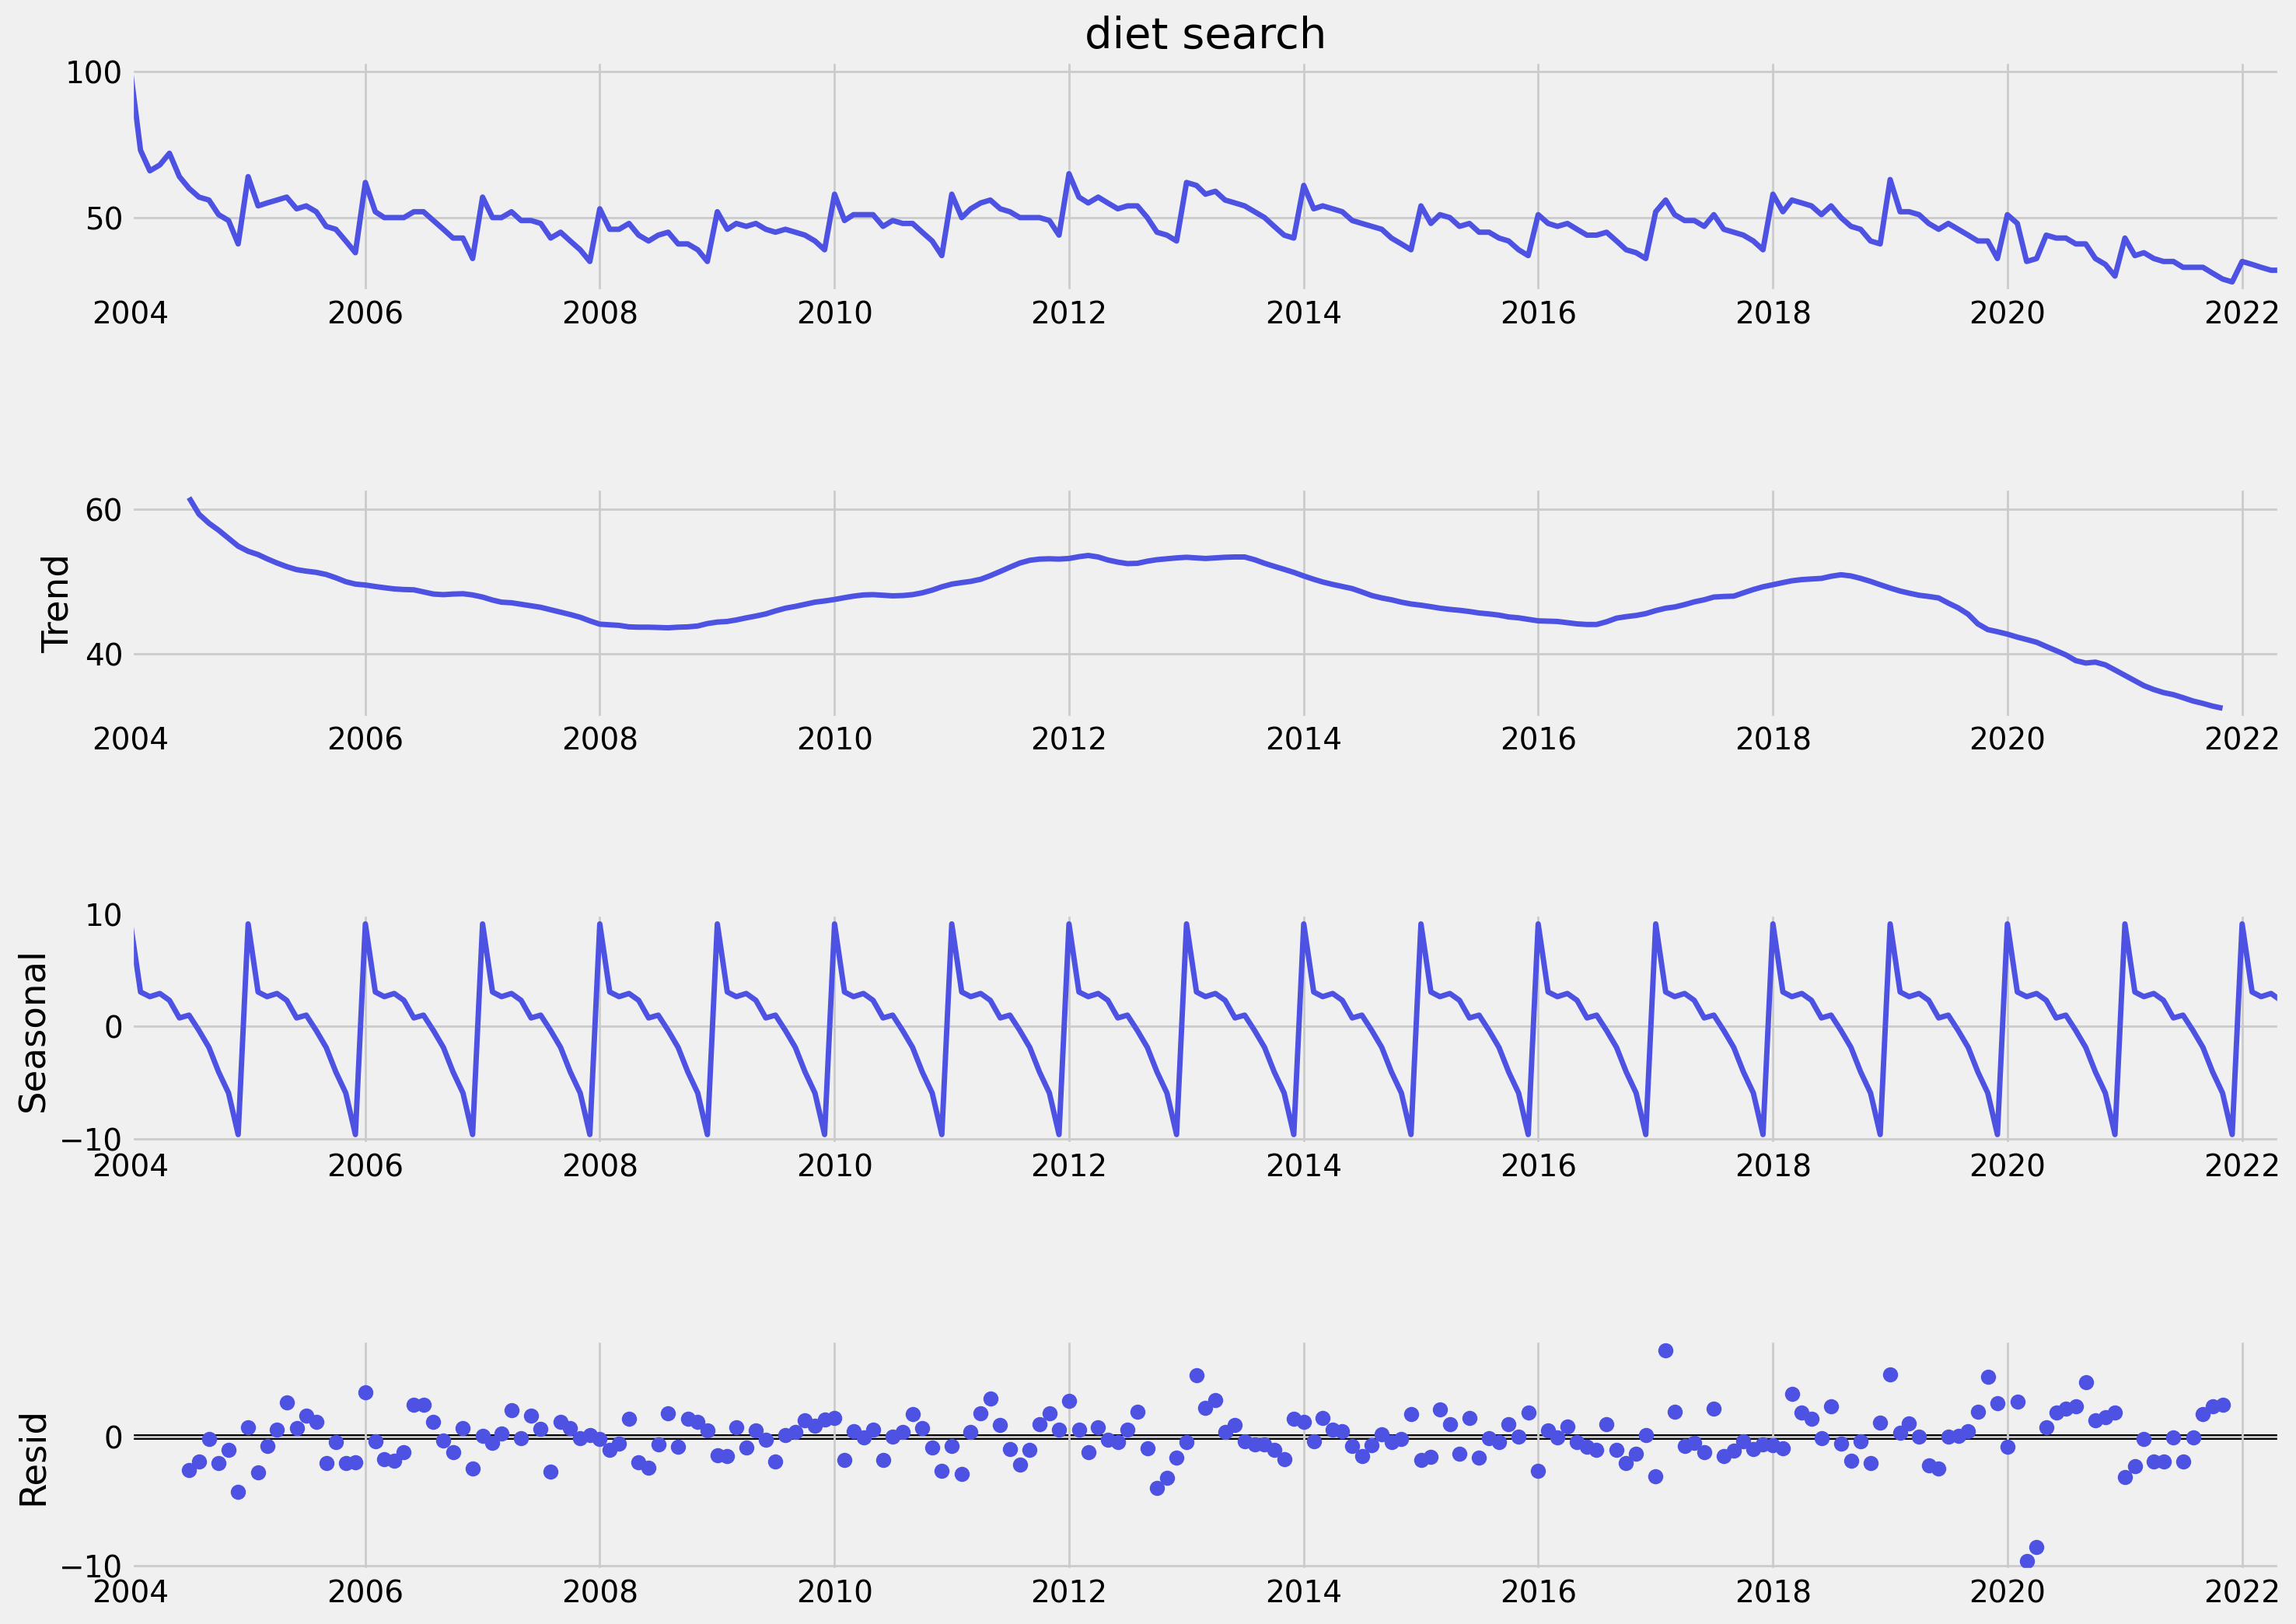

In [9]:
_ =diet_decomp.plot().set_size_inches((15, 12))

In [10]:
diet_series = df_diet["diet search"]

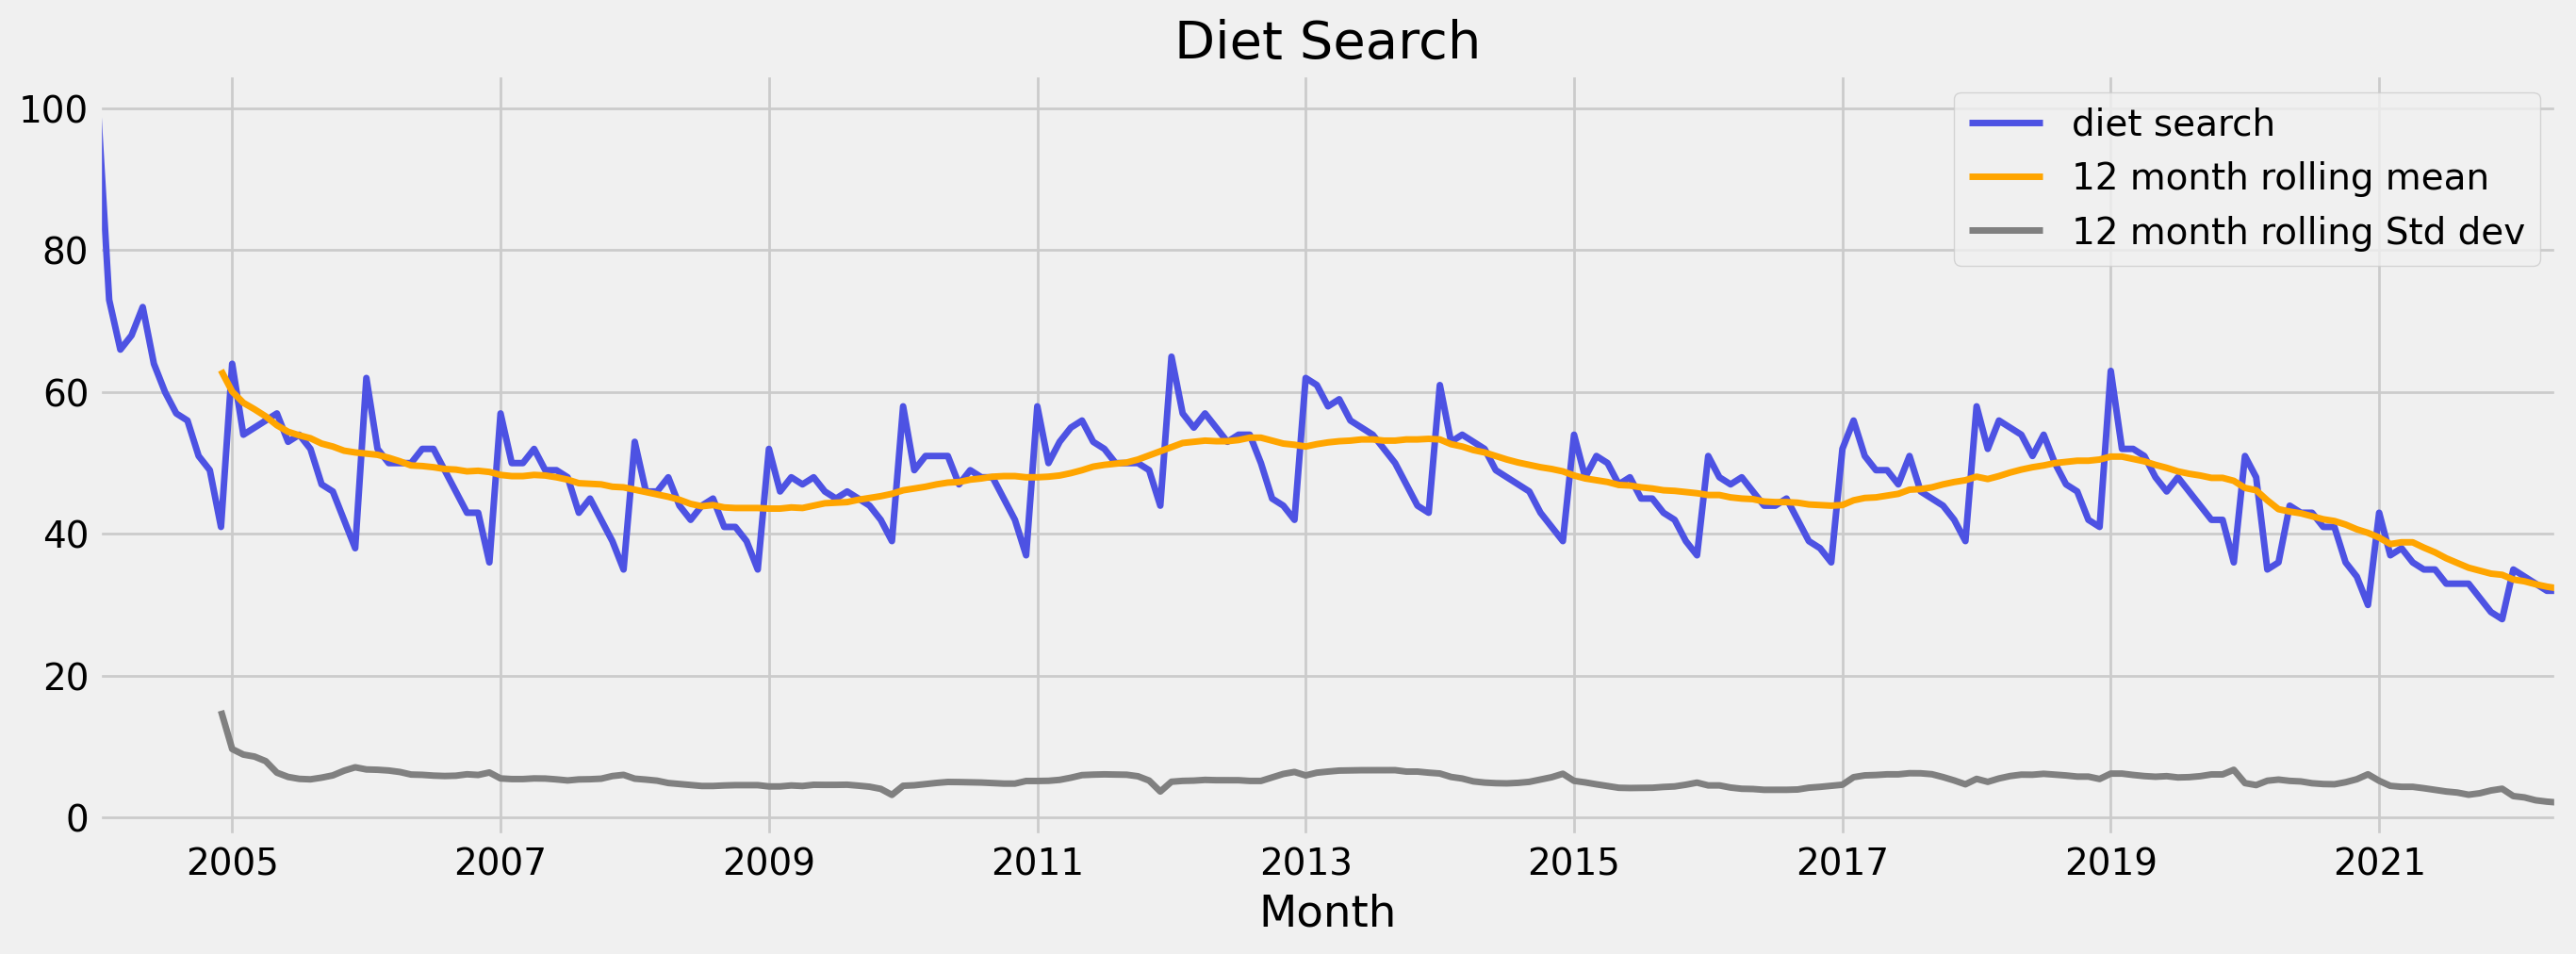

In [11]:
diet_series.plot(label = "diet search",title = "Diet Search")
diet_series.rolling(12).mean().plot(label ="12 month rolling mean",color = "orange")
diet_series.rolling(12).std().plot(label ="12 month rolling Std dev", color = "grey")
plt.legend();

## AUGMENTED DICKY FULLER TEST - CHECK STATIONARITY

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
diet_adf = adfuller(diet_series)

In [14]:
diet_adf

(-0.27594628948806366,
 0.9288426445547275,
 14,
 206,
 {'1%': -3.4624988216864776,
  '5%': -2.8756749365852587,
  '10%': -2.5743041549627677},
 1019.4981709525529)

In [15]:
def adf_check(series):
    
    result = adfuller(series)
    print(f"AUGMENTED DICKY FULLER TEST - {series.name}\n***************************")
    labels = ["ADF test Statistic", "p-value","No. of lags", "No. of Observations" ]
    
    for label, value in zip(labels,result):
        print(f"{label}:    {value}")
        
    if result[1] > 0.05:
        print("\nWeak evidence against null hypothesis (H0)")
        print("Failed to reject H0")
        print("Time series has unit root, it is NON- STATIONARY")
    
    else:
        print("\nStrong evidence against null hypothesis (H0)")
        print("Reject H0")
        print("Time series has no-unit root, it is STATIONARY")
    

In [16]:
adf_check(diet_series)

AUGMENTED DICKY FULLER TEST - diet search
***************************
ADF test Statistic:    -0.27594628948806366
p-value:    0.9288426445547275
No. of lags:    14
No. of Observations:    206

Weak evidence against null hypothesis (H0)
Failed to reject H0
Time series has unit root, it is NON- STATIONARY


## TRANSFORM THE TIME SERIES AS STATIONARY

### a) Differencing

In [17]:
df_diet["Diet First difference"] = diet_series - diet_series.shift(1)

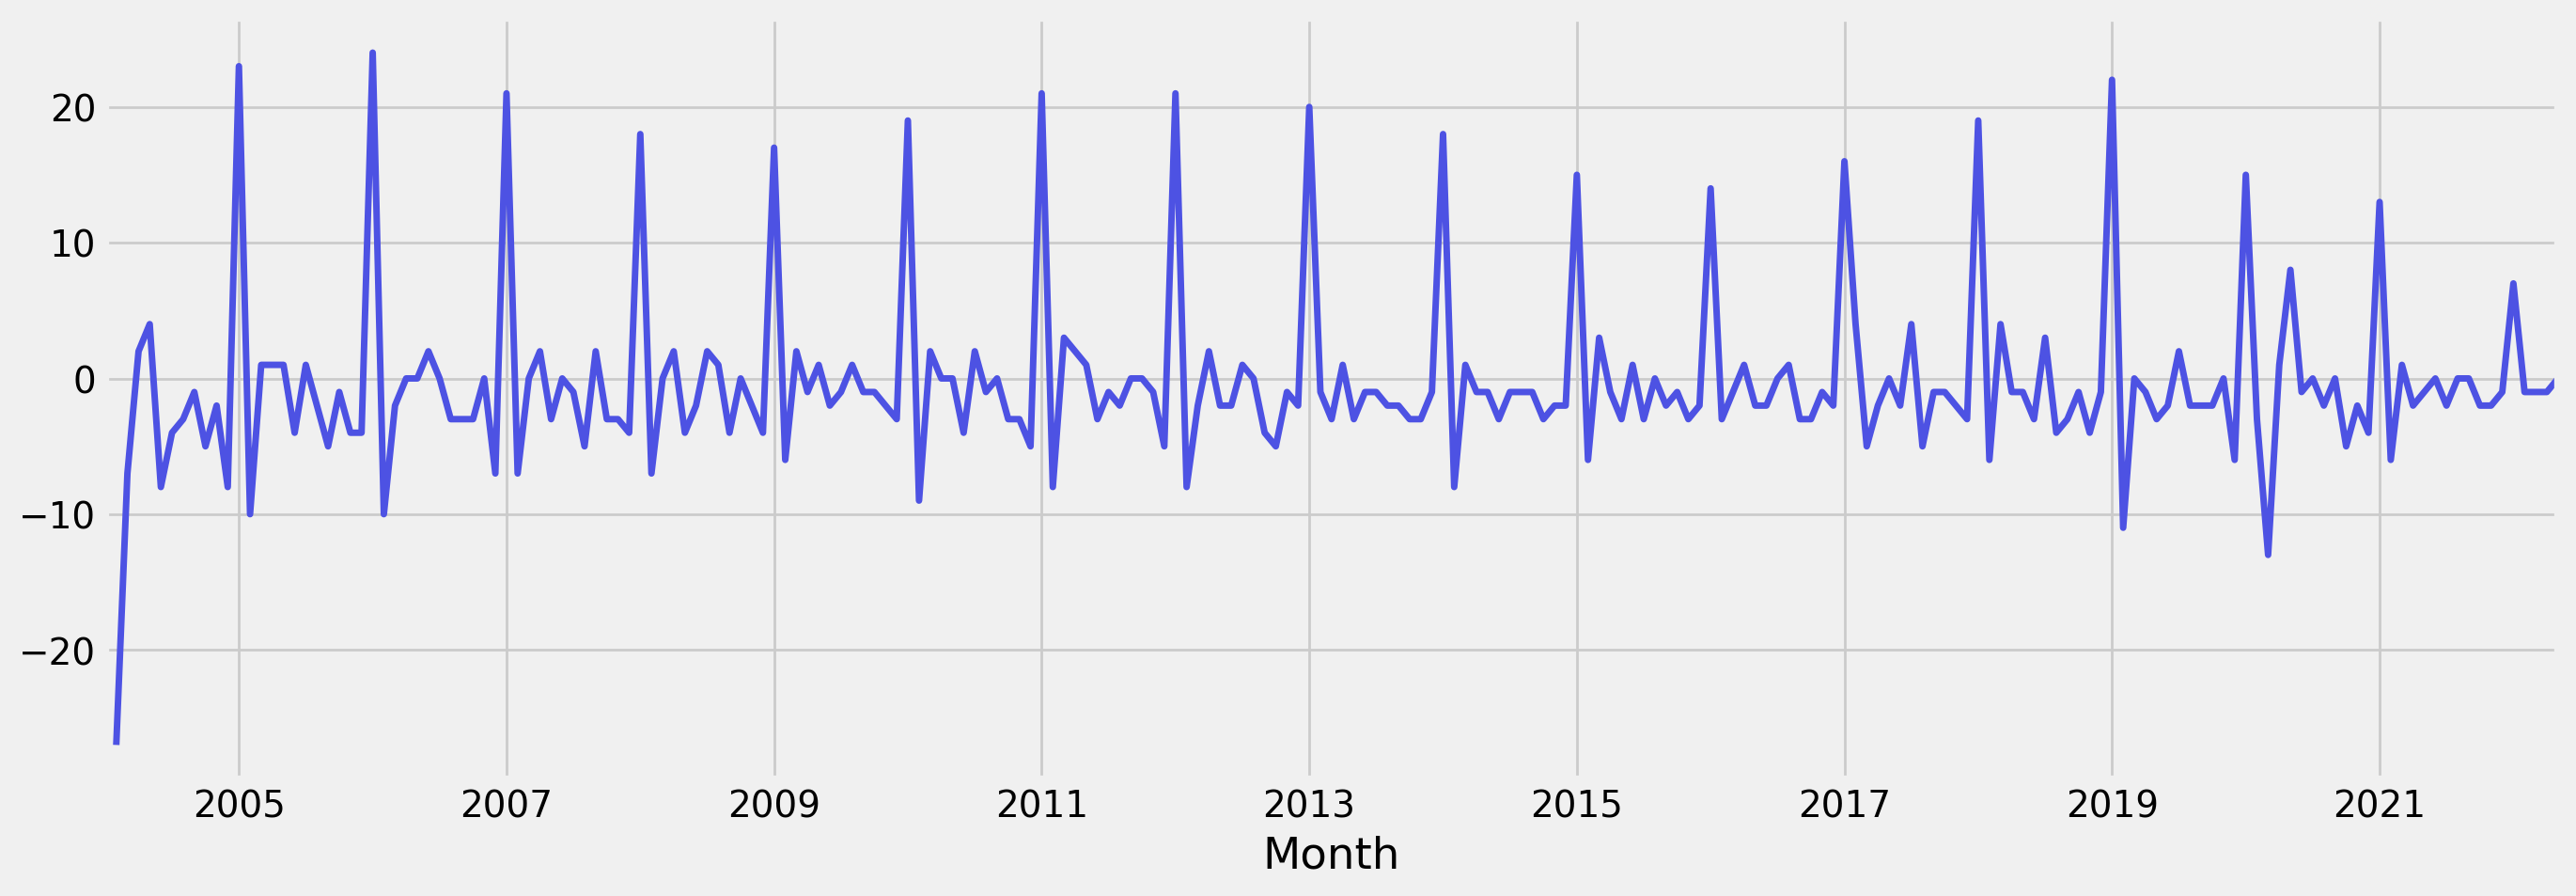

In [18]:
df_diet["Diet First difference"].plot();

In [19]:
adf_check(df_diet["Diet First difference"].dropna())

AUGMENTED DICKY FULLER TEST - Diet First difference
***************************
ADF test Statistic:    -4.096504621647827
p-value:    0.0009814897351942107
No. of lags:    13
No. of Observations:    206

Strong evidence against null hypothesis (H0)
Reject H0
Time series has no-unit root, it is STATIONARY


### b) Seasonal Differencing

In [20]:
df_diet["Diet Seasonal Difference"] = diet_series - diet_series.shift(12)

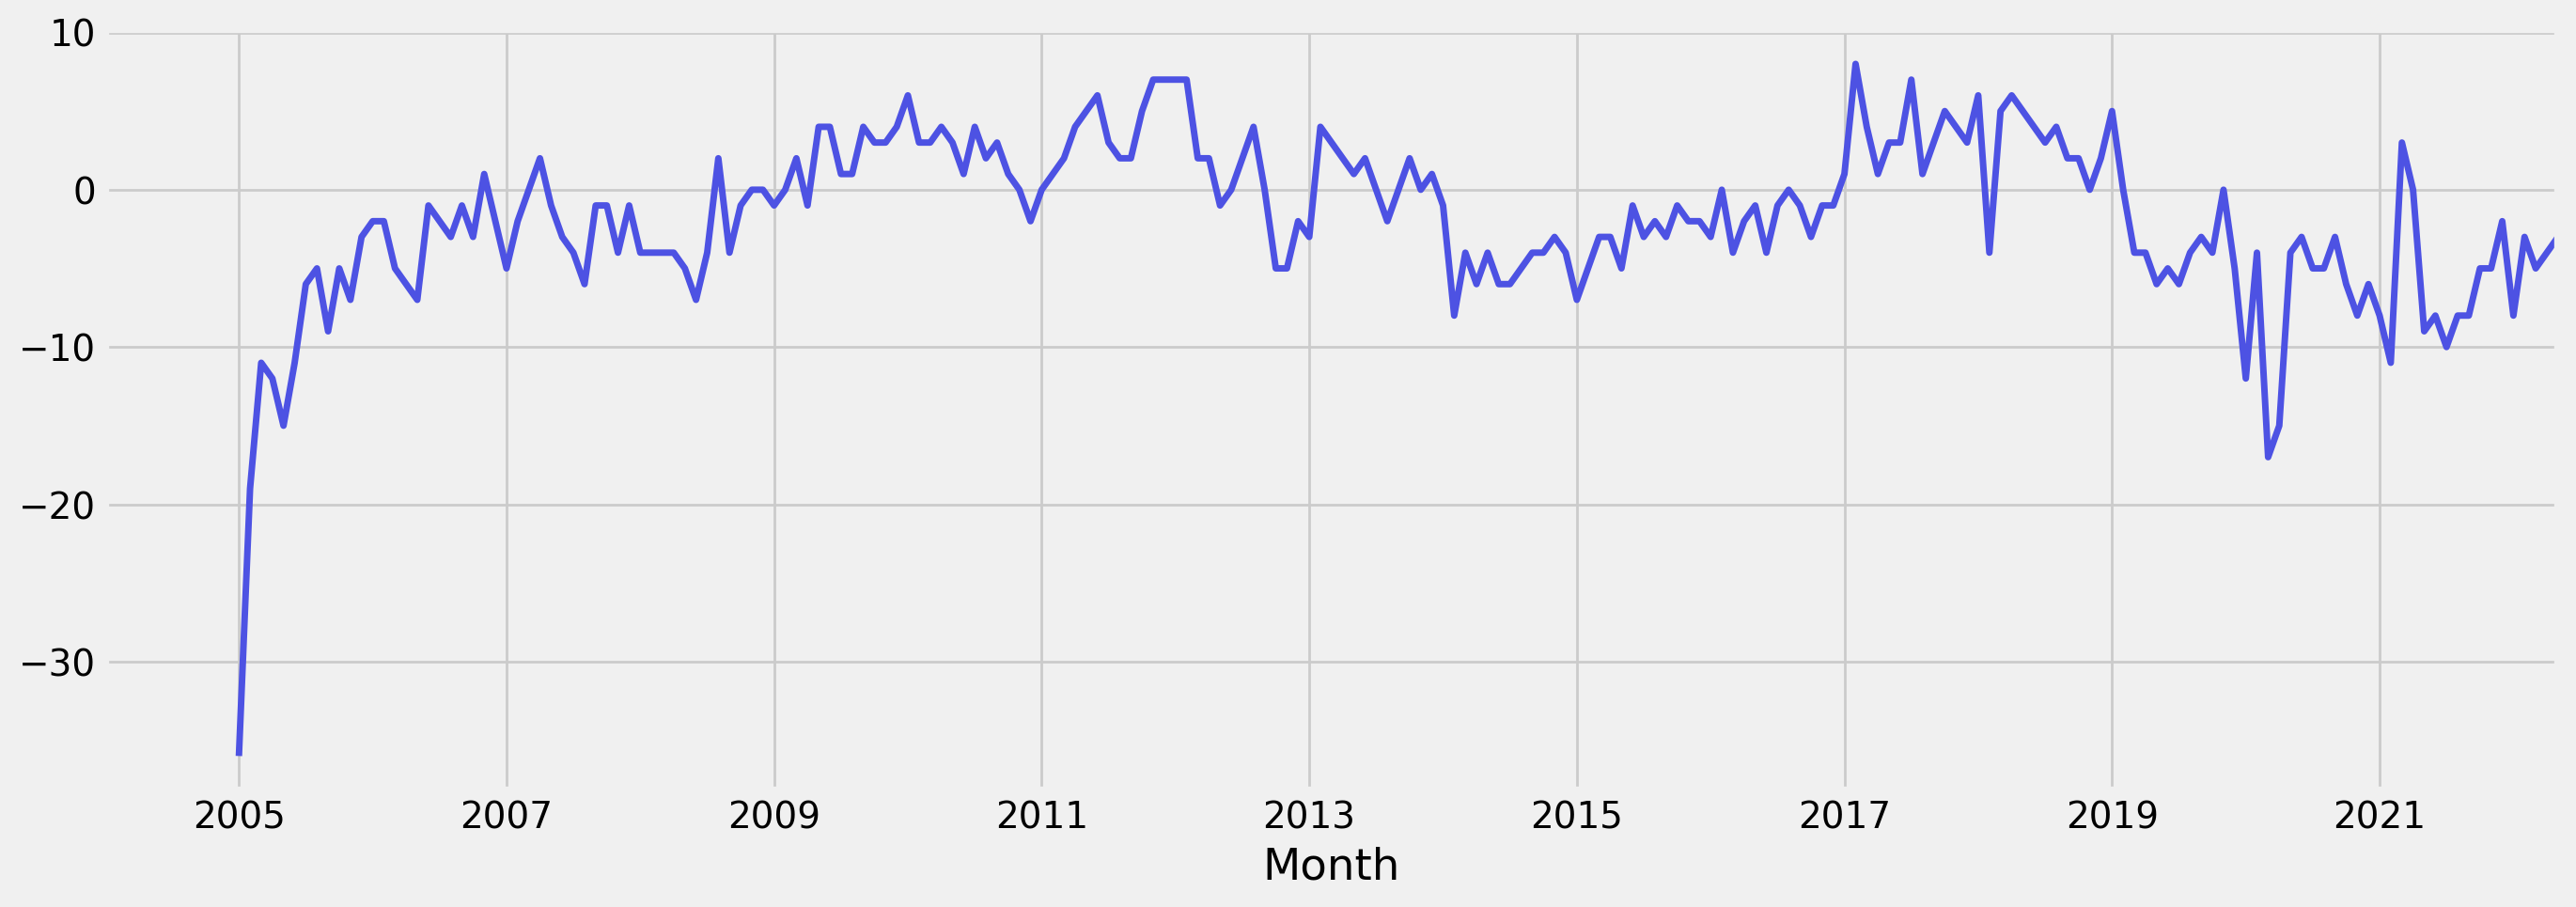

In [21]:
df_diet["Diet Seasonal Difference"].plot();

In [22]:
adf_check(df_diet["Diet Seasonal Difference"].dropna())

AUGMENTED DICKY FULLER TEST - Diet Seasonal Difference
***************************
ADF test Statistic:    -2.593625322941539
p-value:    0.09432195415894945
No. of lags:    12
No. of Observations:    196

Weak evidence against null hypothesis (H0)
Failed to reject H0
Time series has unit root, it is NON- STATIONARY


### b.2) Seasonal  1st Differencing

In [23]:
df_diet["Diet Seasonal First Difference"] = df_diet["Diet First difference"]- df_diet["Diet First difference"].shift(12)

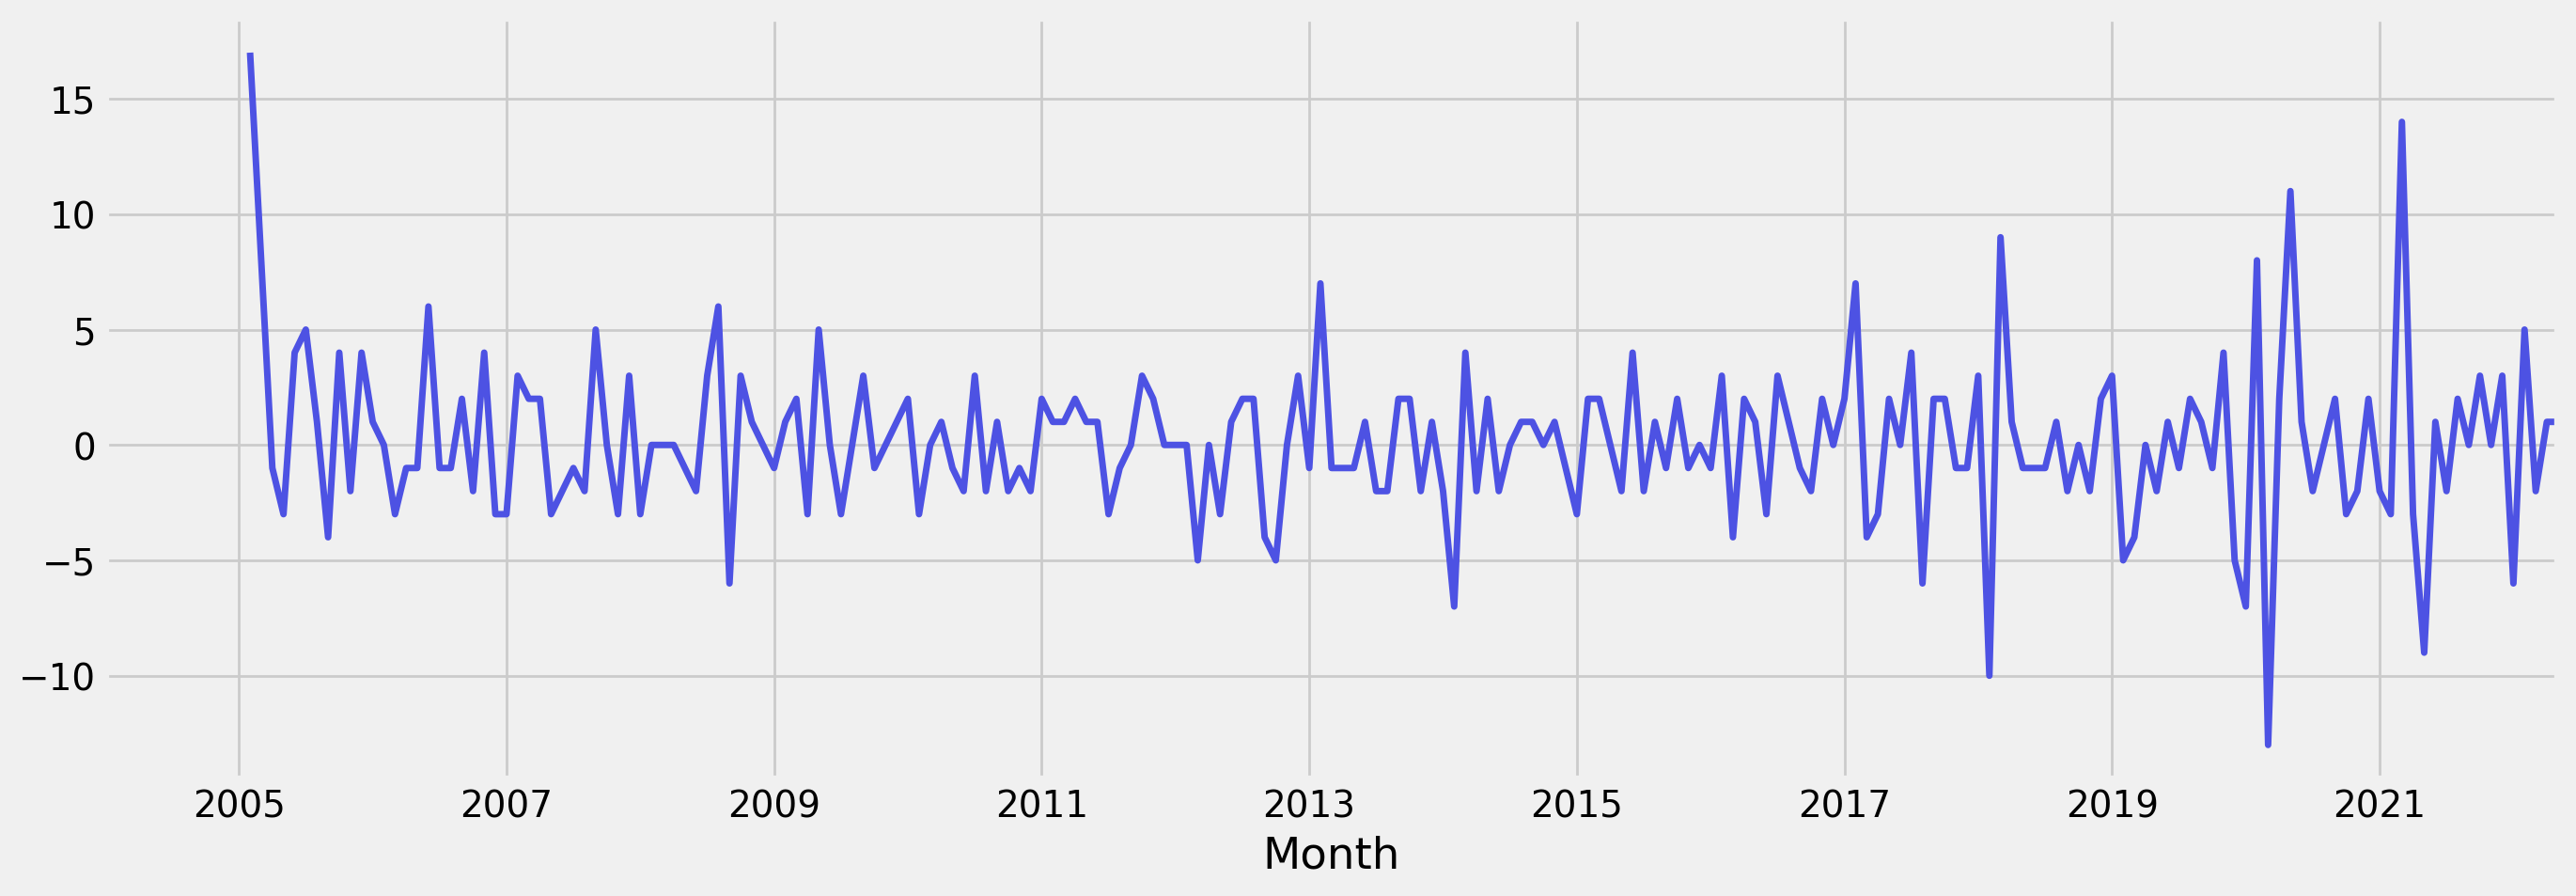

In [24]:
df_diet["Diet Seasonal First Difference"].plot();

In [25]:
adf_check(df_diet["Diet Seasonal First Difference"].dropna())

AUGMENTED DICKY FULLER TEST - Diet Seasonal First Difference
***************************
ADF test Statistic:    -4.2555738365103535
p-value:    0.000529836207943027
No. of lags:    11
No. of Observations:    196

Strong evidence against null hypothesis (H0)
Reject H0
Time series has no-unit root, it is STATIONARY


## ACF and PACF plots of the stationary series 

### Diet First difference

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

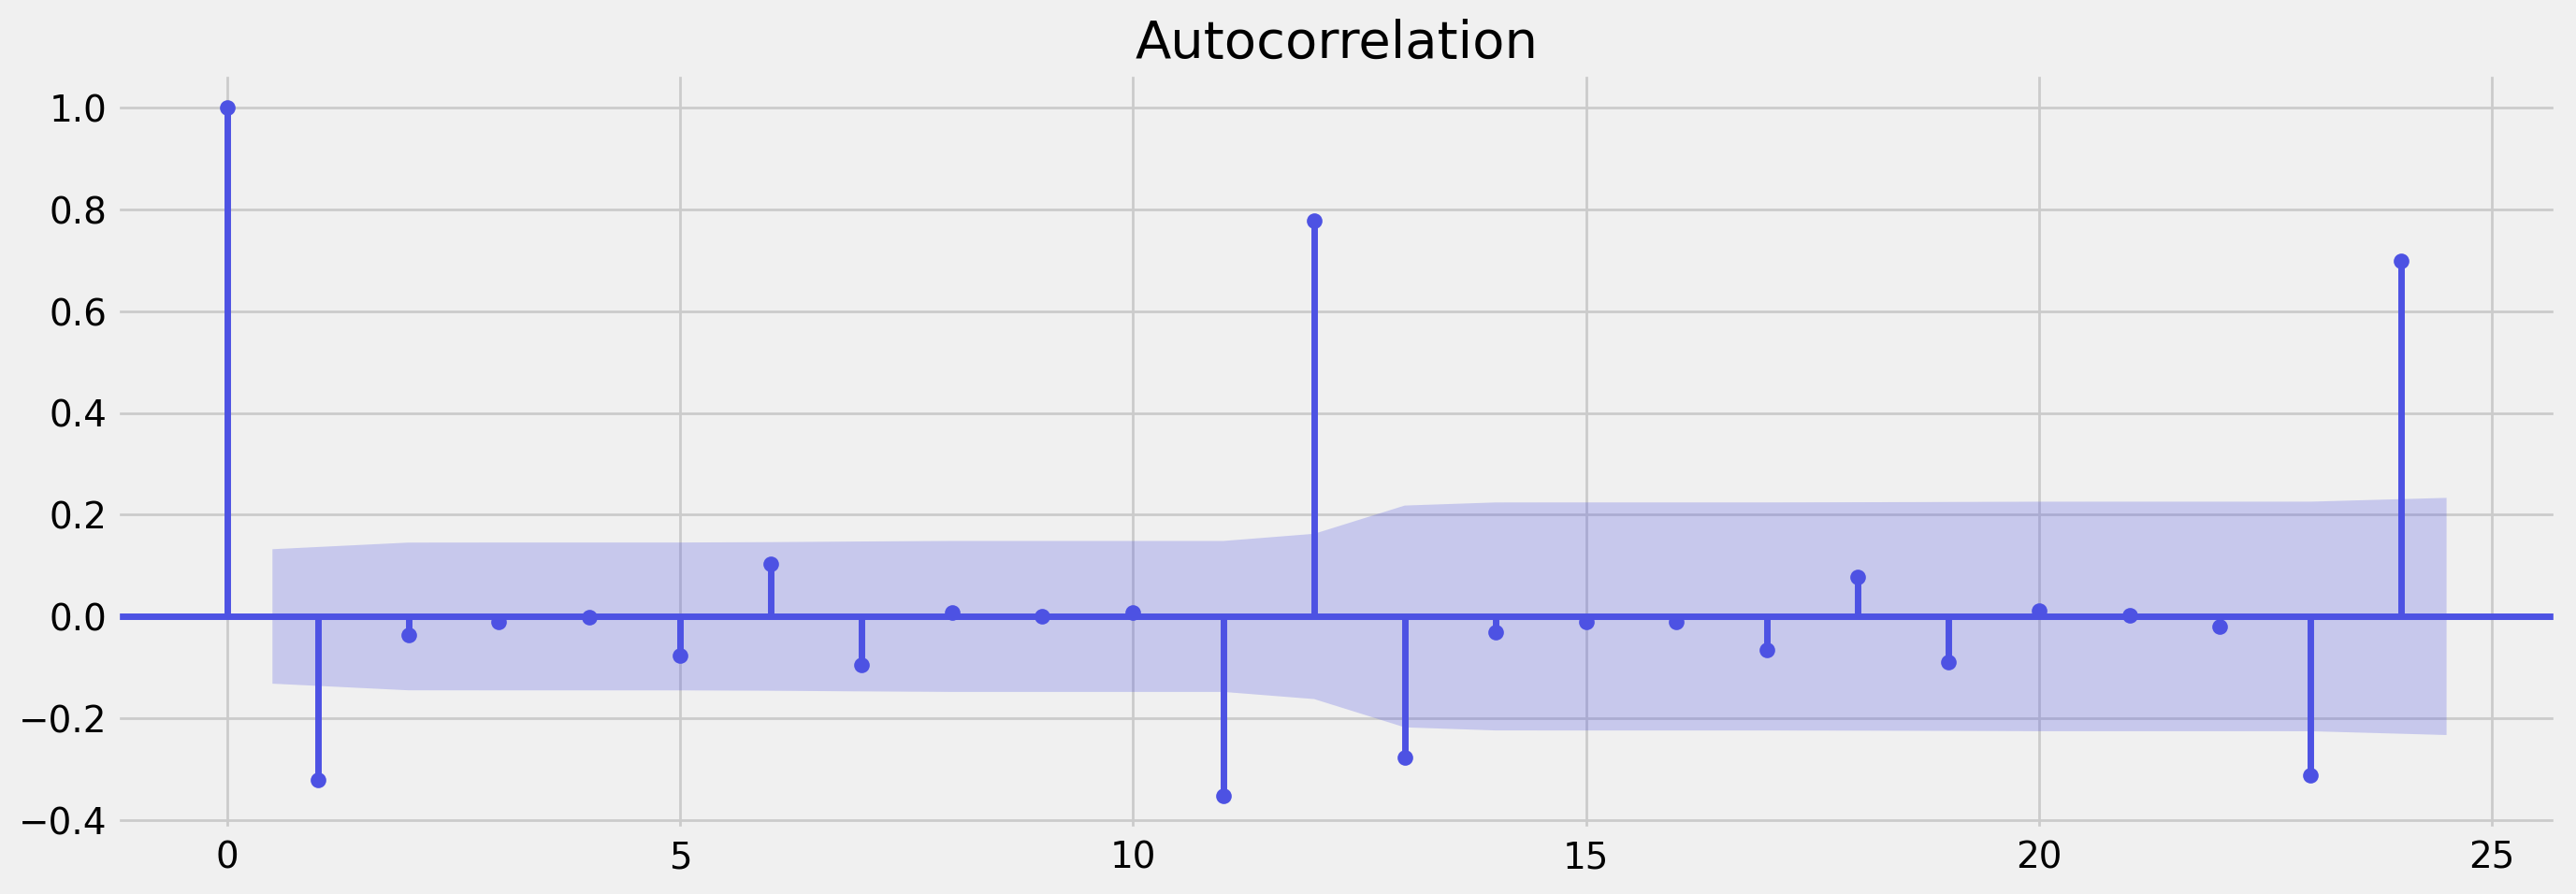

In [27]:
diet_first_acf =plot_acf(df_diet["Diet First difference"].dropna())

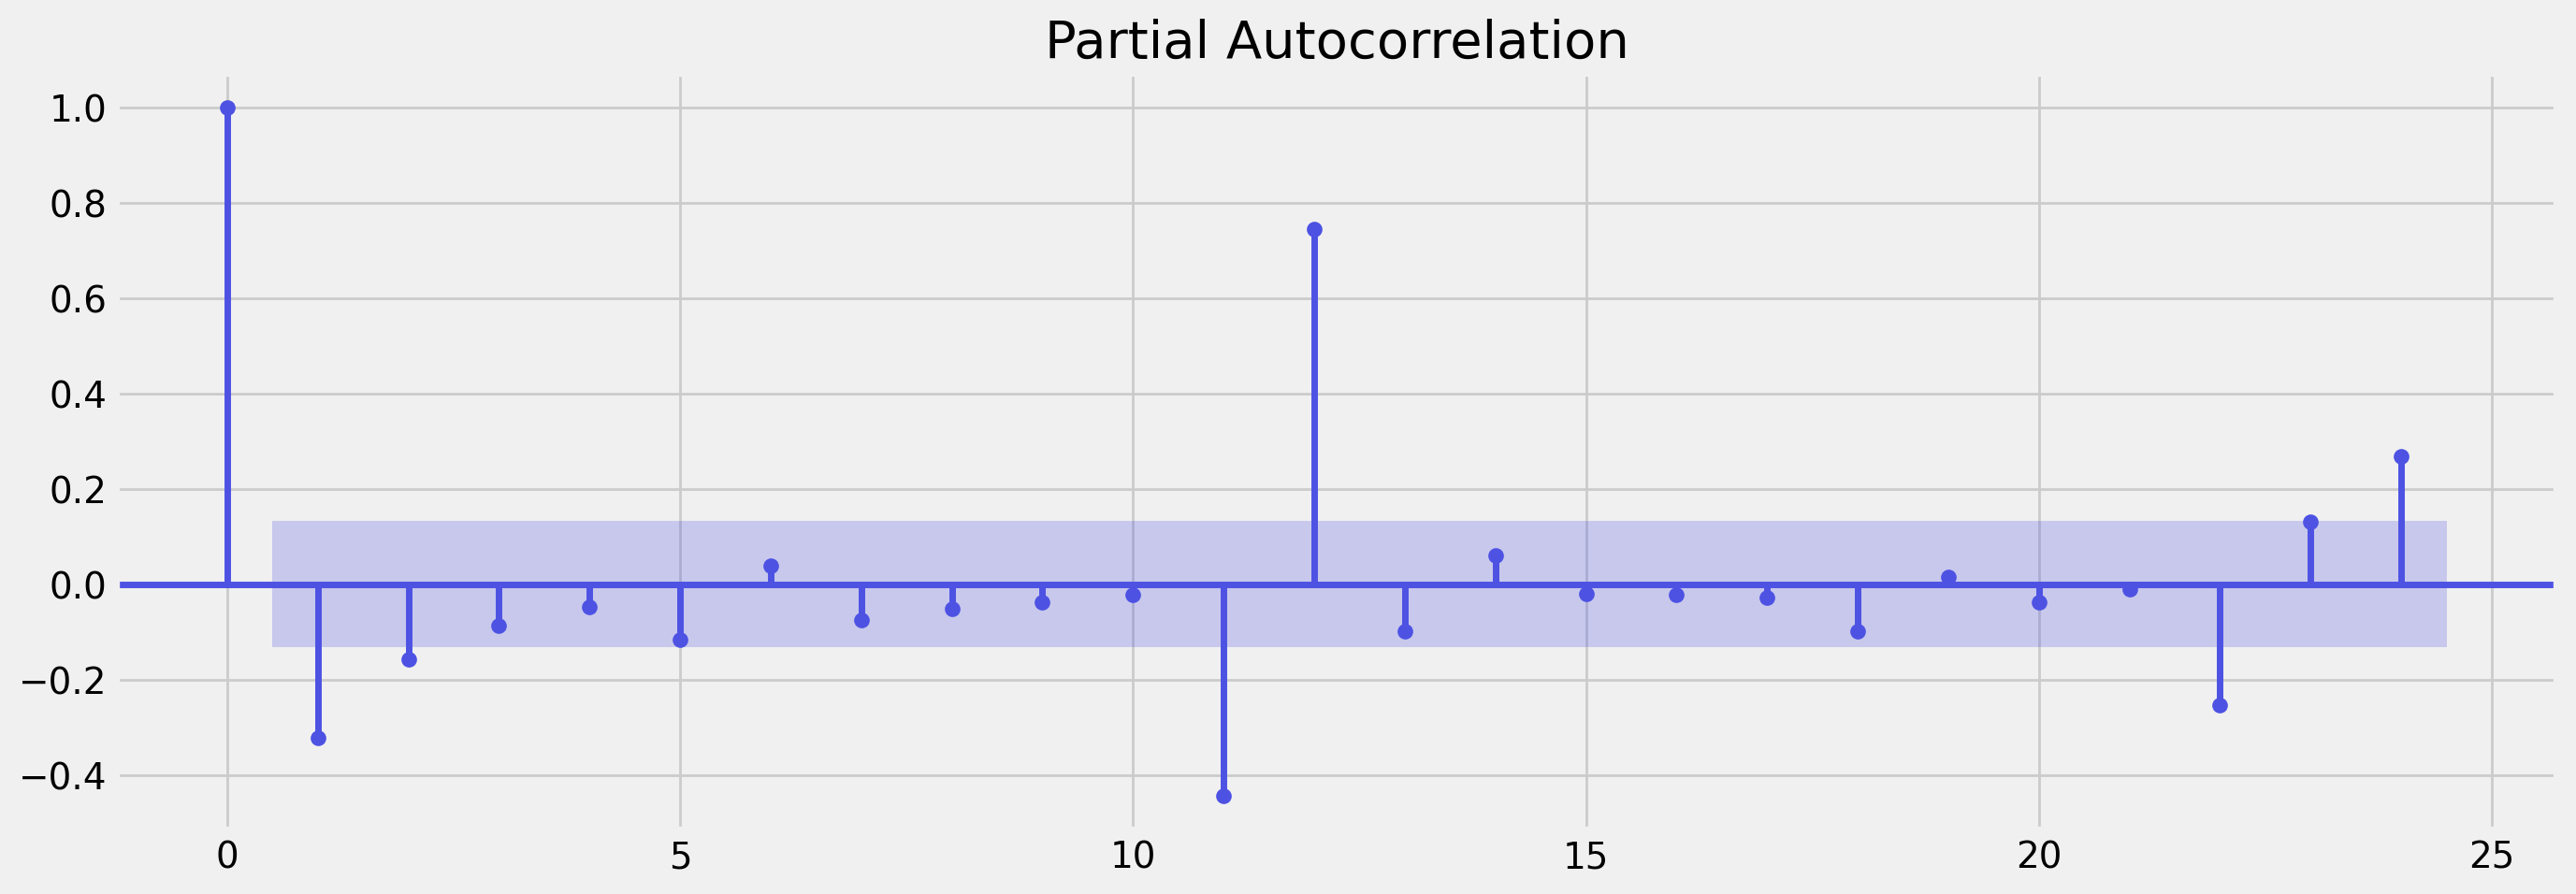

In [28]:
diet_first_pacf =plot_pacf(df_diet["Diet First difference"].dropna())

### Diet Seasonal First difference

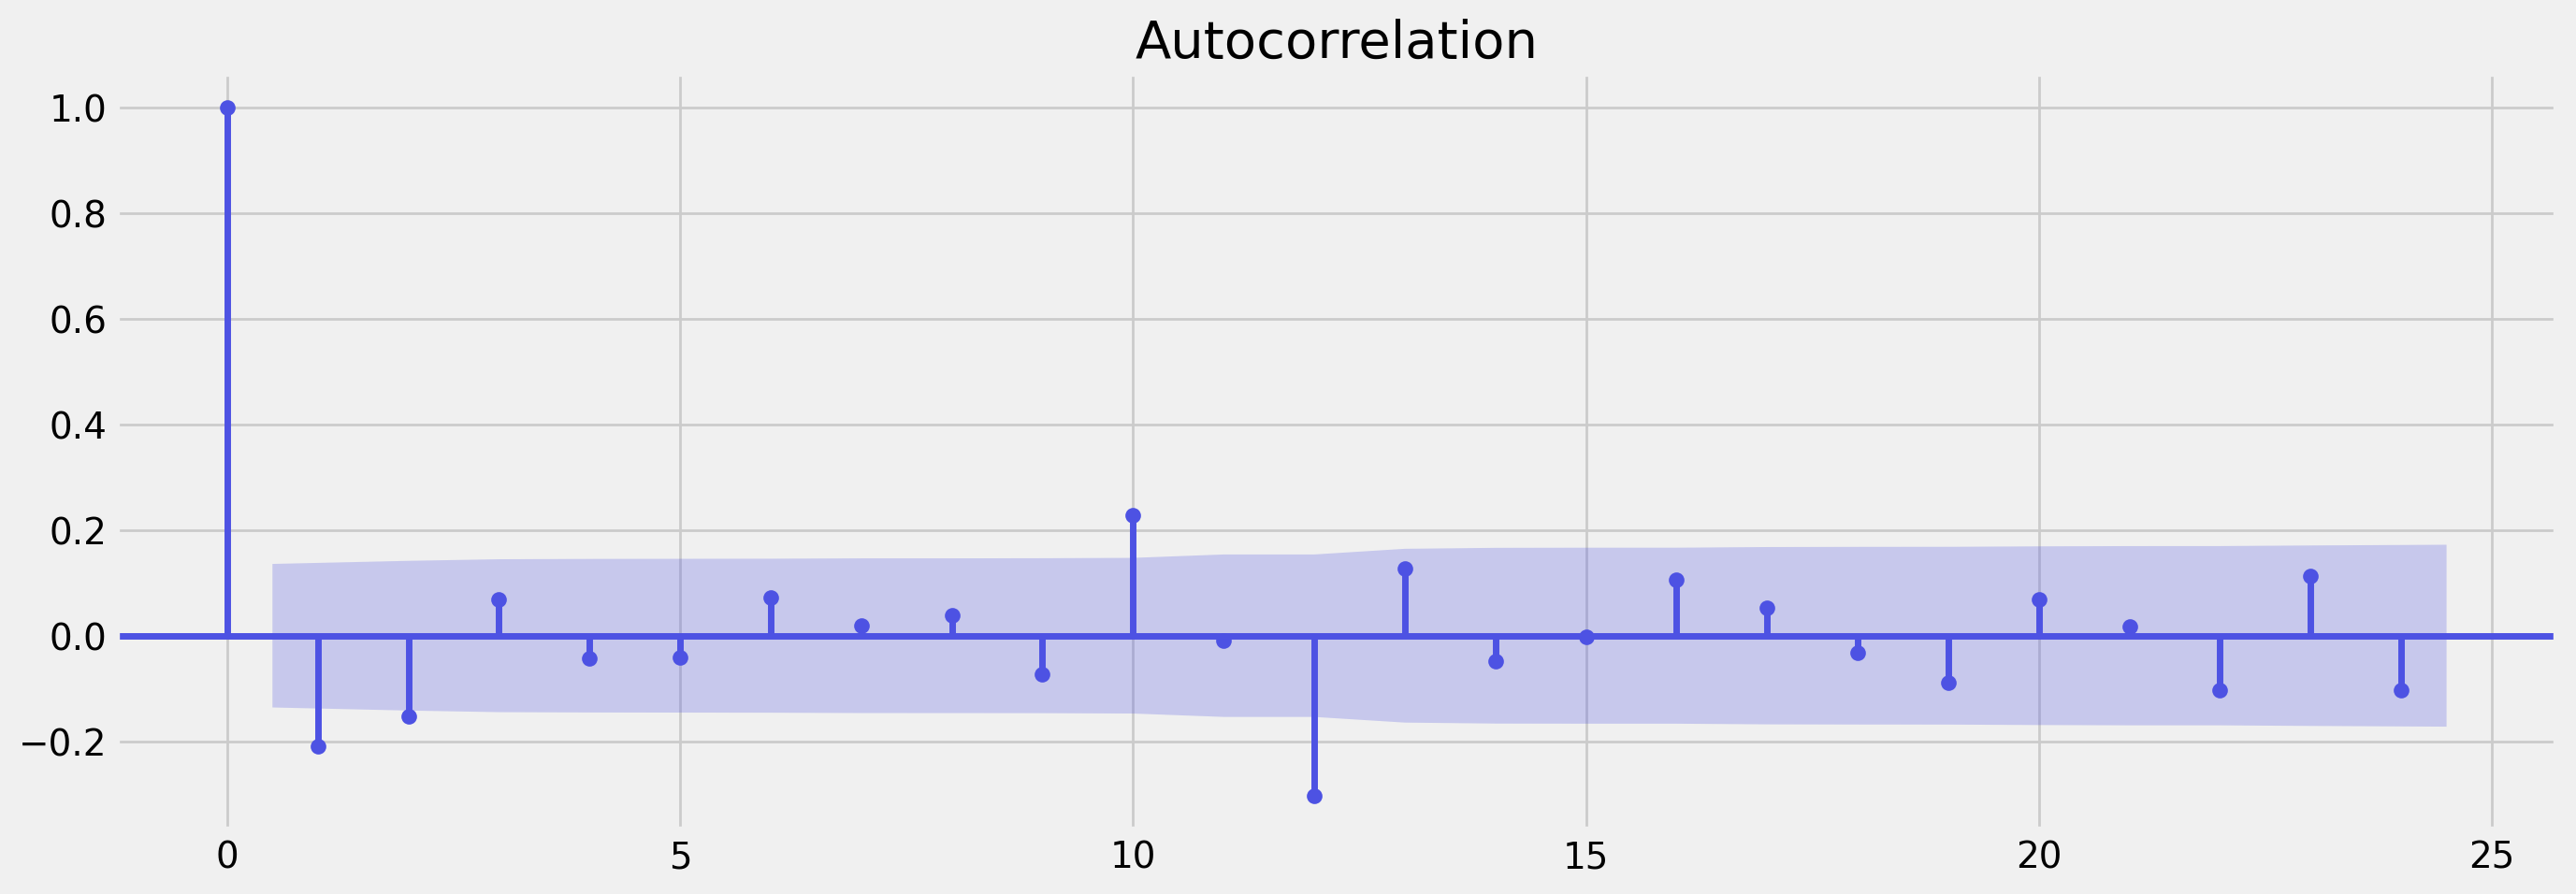

In [29]:
diet_seas_first_acf = plot_acf(df_diet["Diet Seasonal First Difference"].dropna())


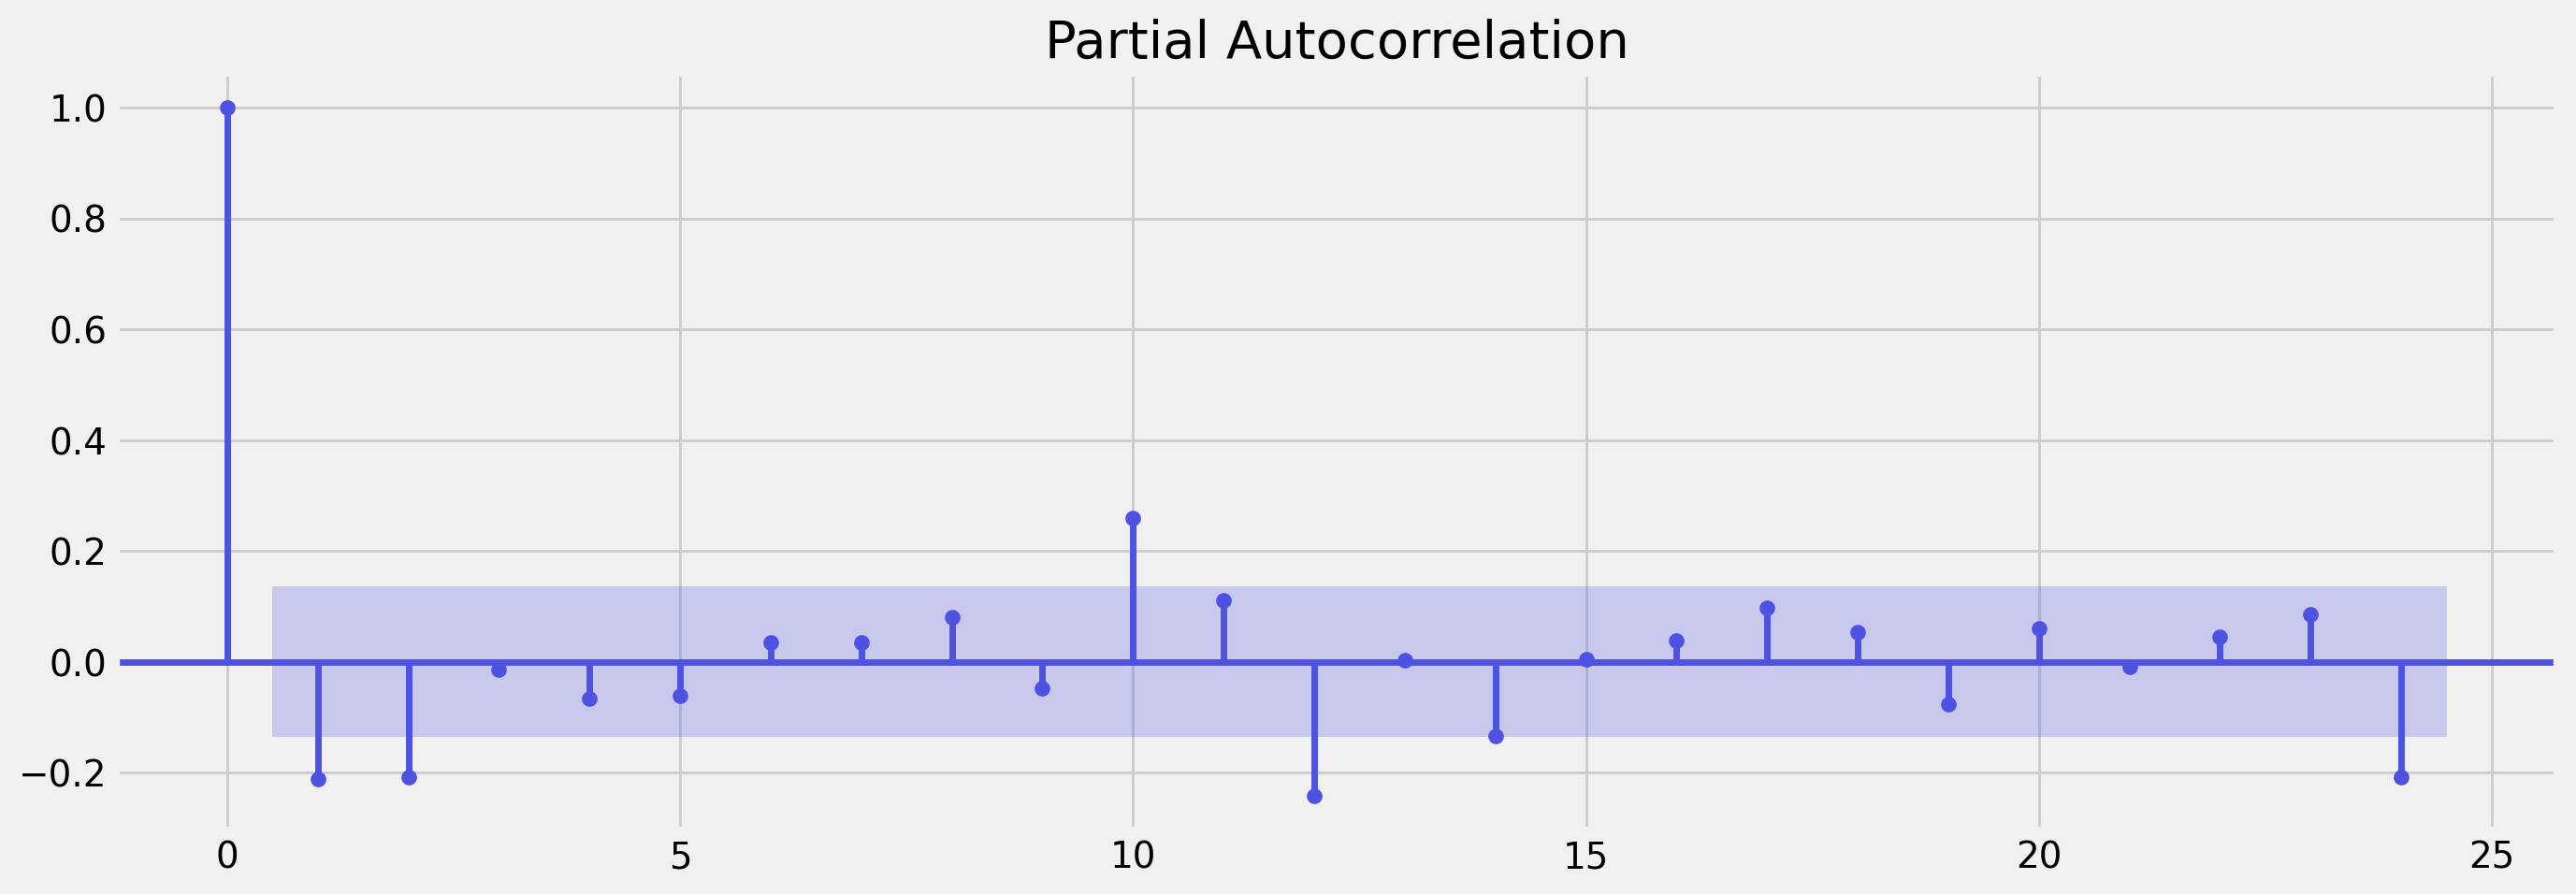

In [30]:
diet_seas_first_pacf = plot_pacf(df_diet["Diet Seasonal First Difference"].dropna())

## FITTING ARIMA (w/o seasonality)

In [31]:
from statsmodels.tsa.arima_model import ARIMA

In [32]:
model =ARIMA(df_diet['diet search'][:200], order =(1,0,0))
model_fit = model.fit()

C:\Users\prita\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\prita\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [33]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            diet search   No. Observations:                  200
Model:                     ARMA(1, 0)   Log Likelihood                -650.819
Method:                       css-mle   S.D. of innovations              6.257
Date:                Thu, 02 Jun 2022   AIC                           1307.639
Time:                        18:20:55   BIC                           1317.534
Sample:                    01-01-2004   HQIC                          1311.643
                         - 08-01-2020                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                49.4750      1.329     37.233      0.000      46.871      52.079
ar.L1.diet search     0.6690      0.064     10.500      0.000       0.544       0.794
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4947           +0.0000j            1.4947            0.0000
-----------------------------------------------------------------------------
"""

In [34]:
df_diet["ARIMA forecast"] = model_fit.predict(start =200, end = 221)

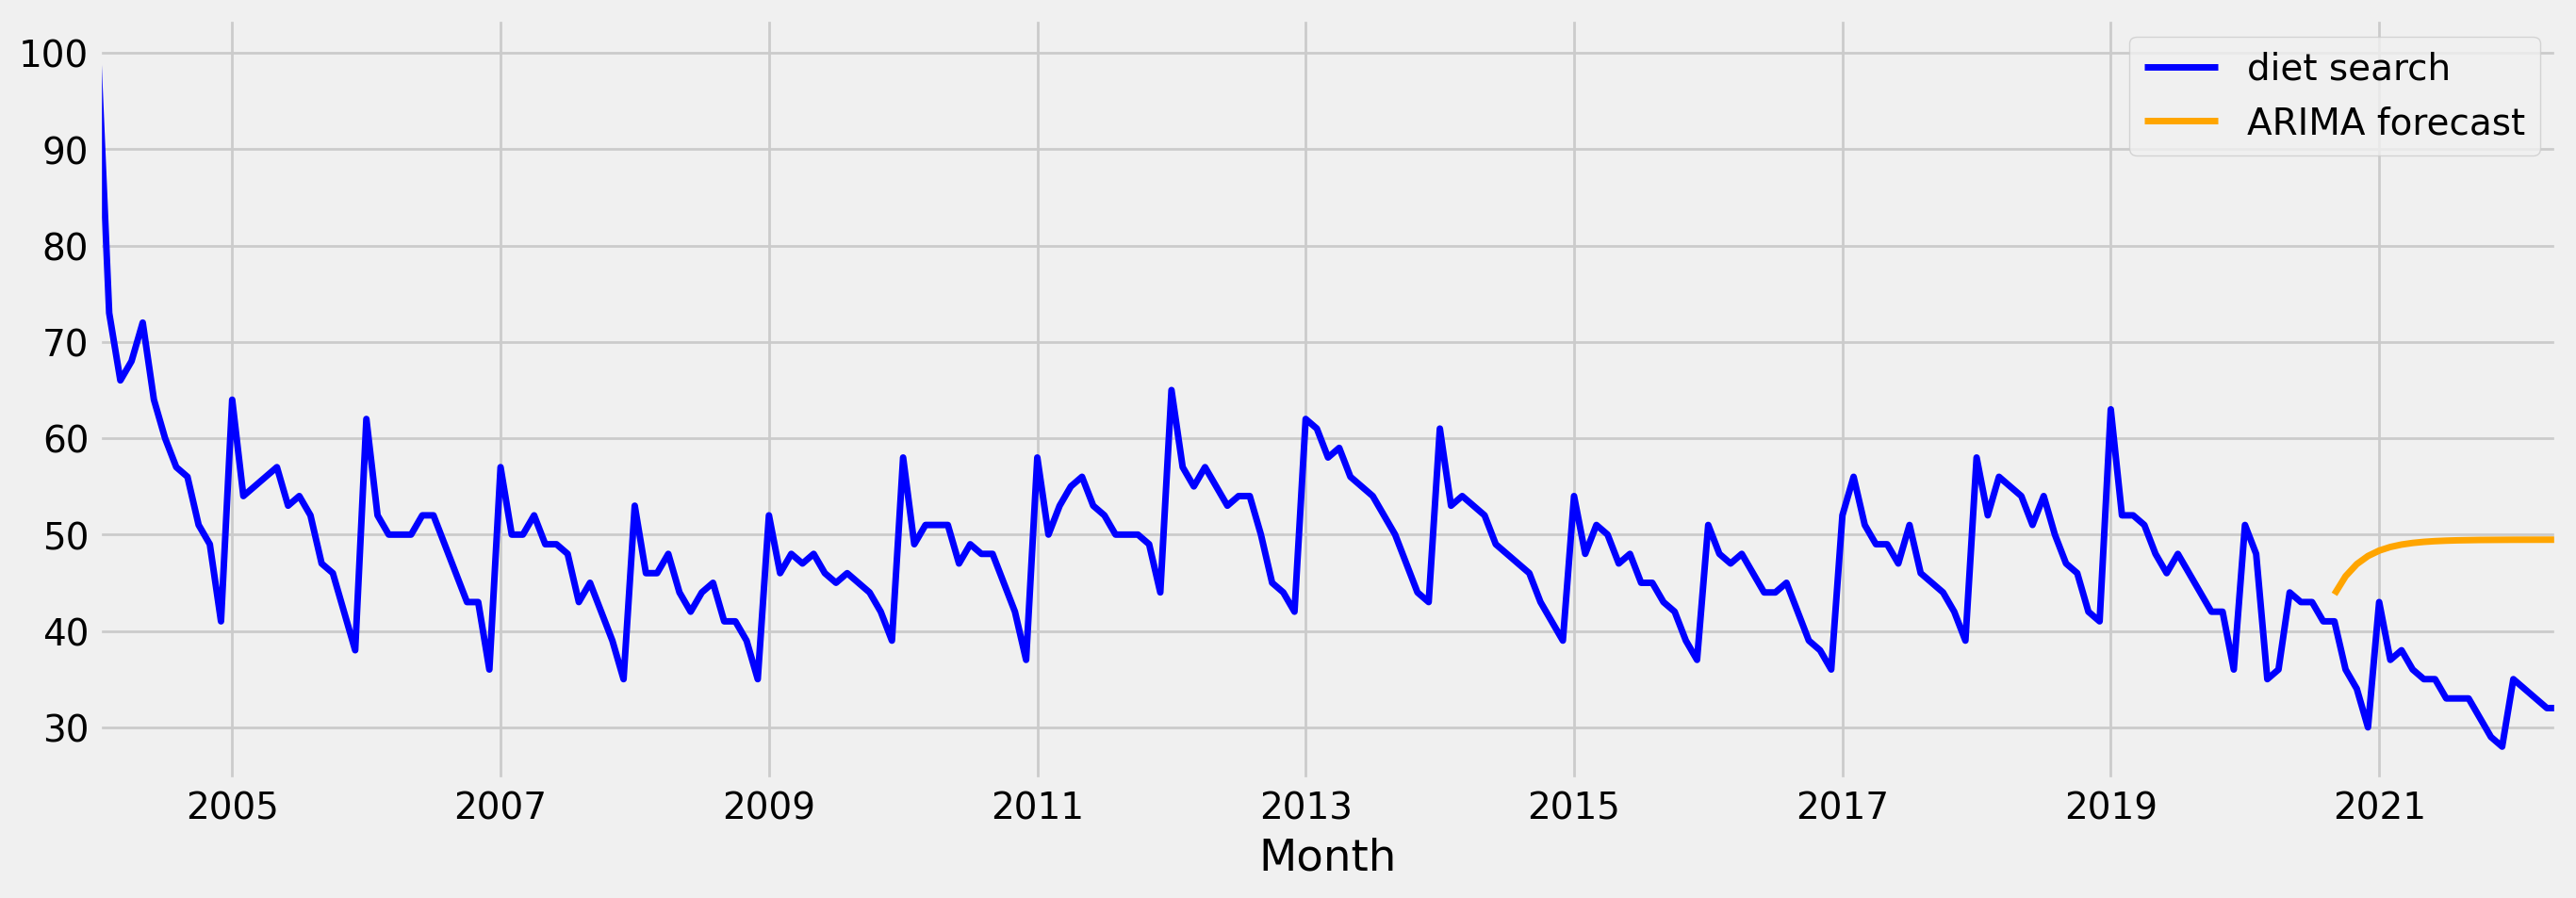

In [35]:
df_diet[['diet search', 'ARIMA forecast']].plot(color= ["b", "orange"]);

## SARIMAX (random parameters)

In [36]:
diet_model1 = sm.tsa.statespace.SARIMAX(df_diet['diet search'][:200], order = (1,1,1),
                                       seasonal_order = (1,1,1,12) )

C:\Users\prita\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\prita\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [37]:
diet_results1 = diet_model1.fit()

In [38]:
print(diet_results1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        diet search   No. Observations:                  200
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -469.710
Date:                            Thu, 02 Jun 2022   AIC                            949.420
Time:                                    18:20:56   BIC                            965.576
Sample:                                01-01-2004   HQIC                           955.966
                                     - 08-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2668      0.170      1.574      0.116      -0.065       0.599
ma.L1         -0.5460      0.160   

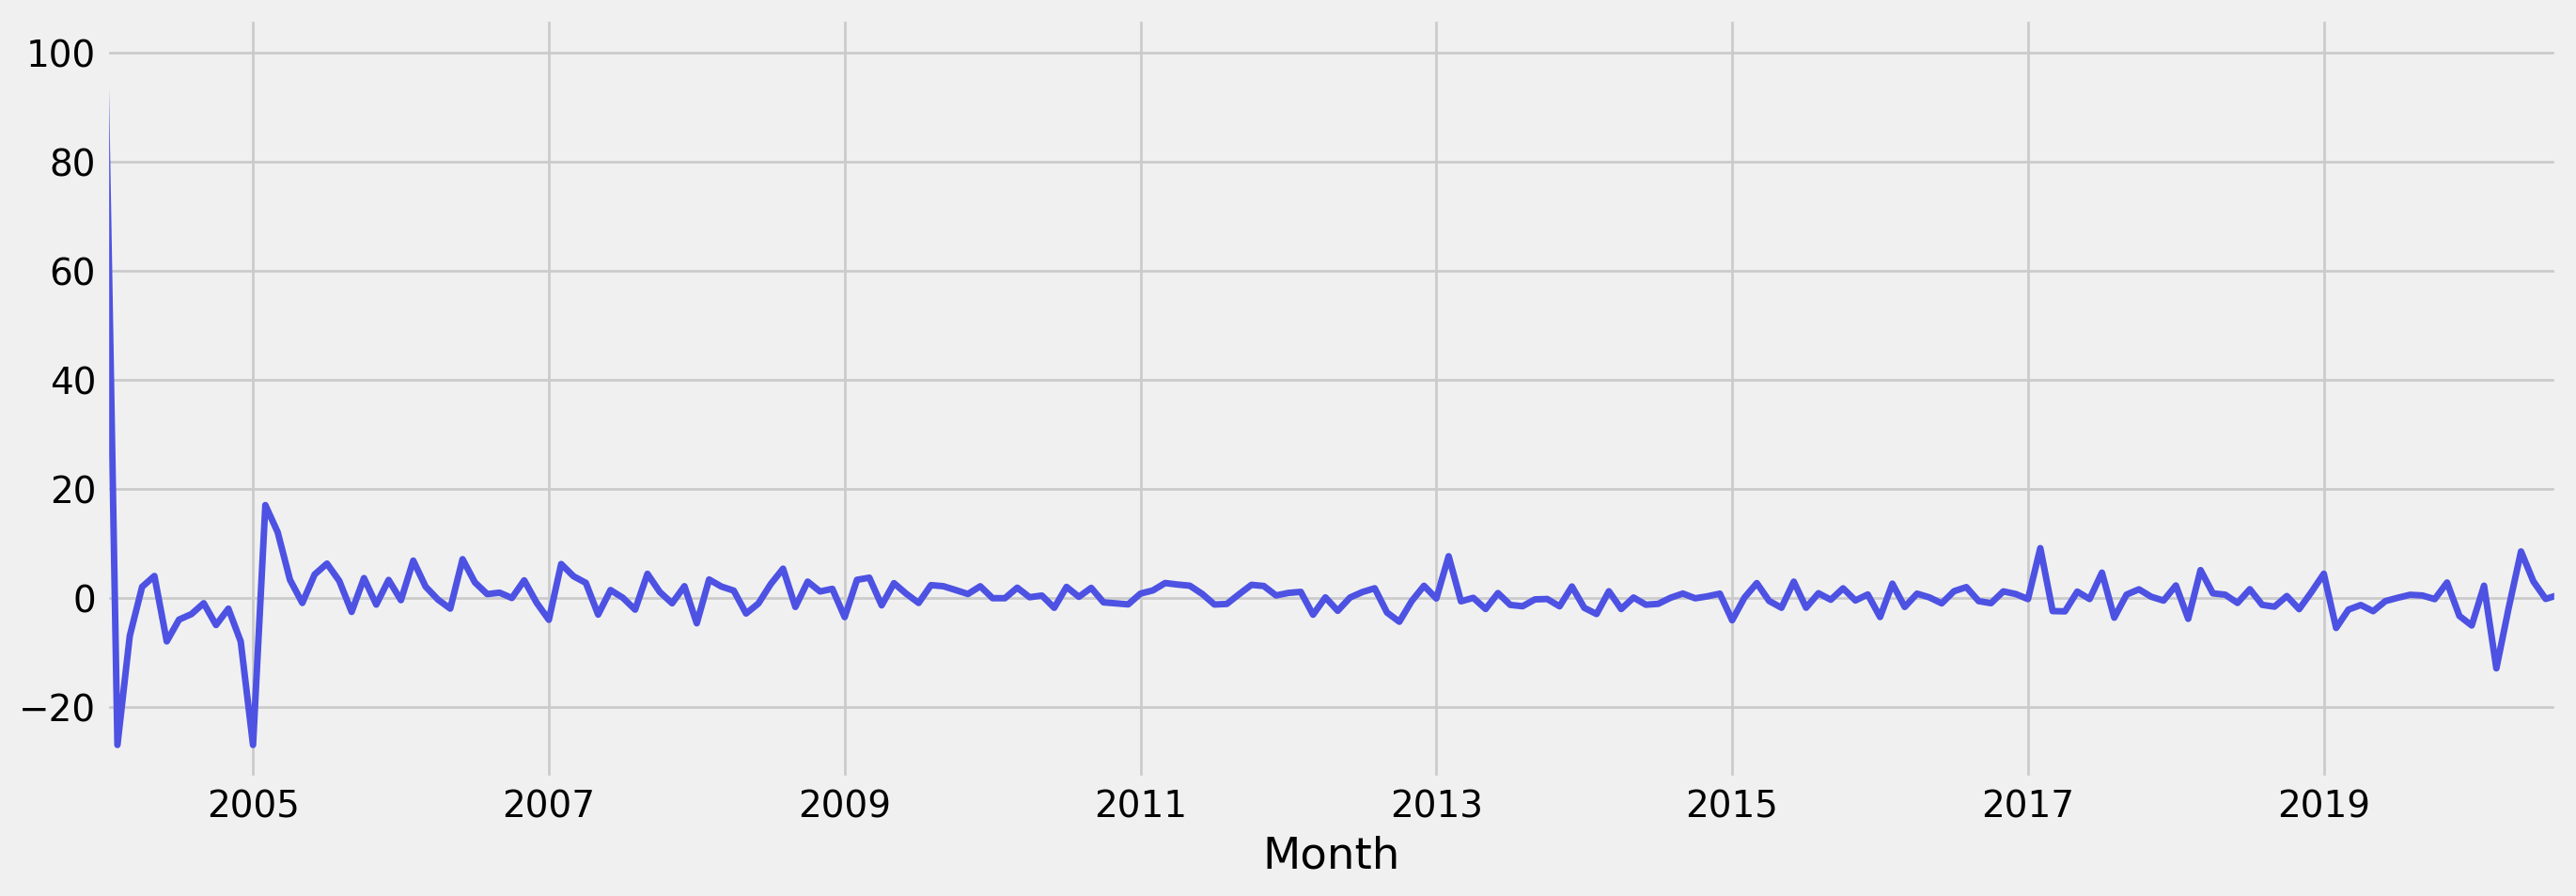

In [39]:
diet_results1.resid.plot();

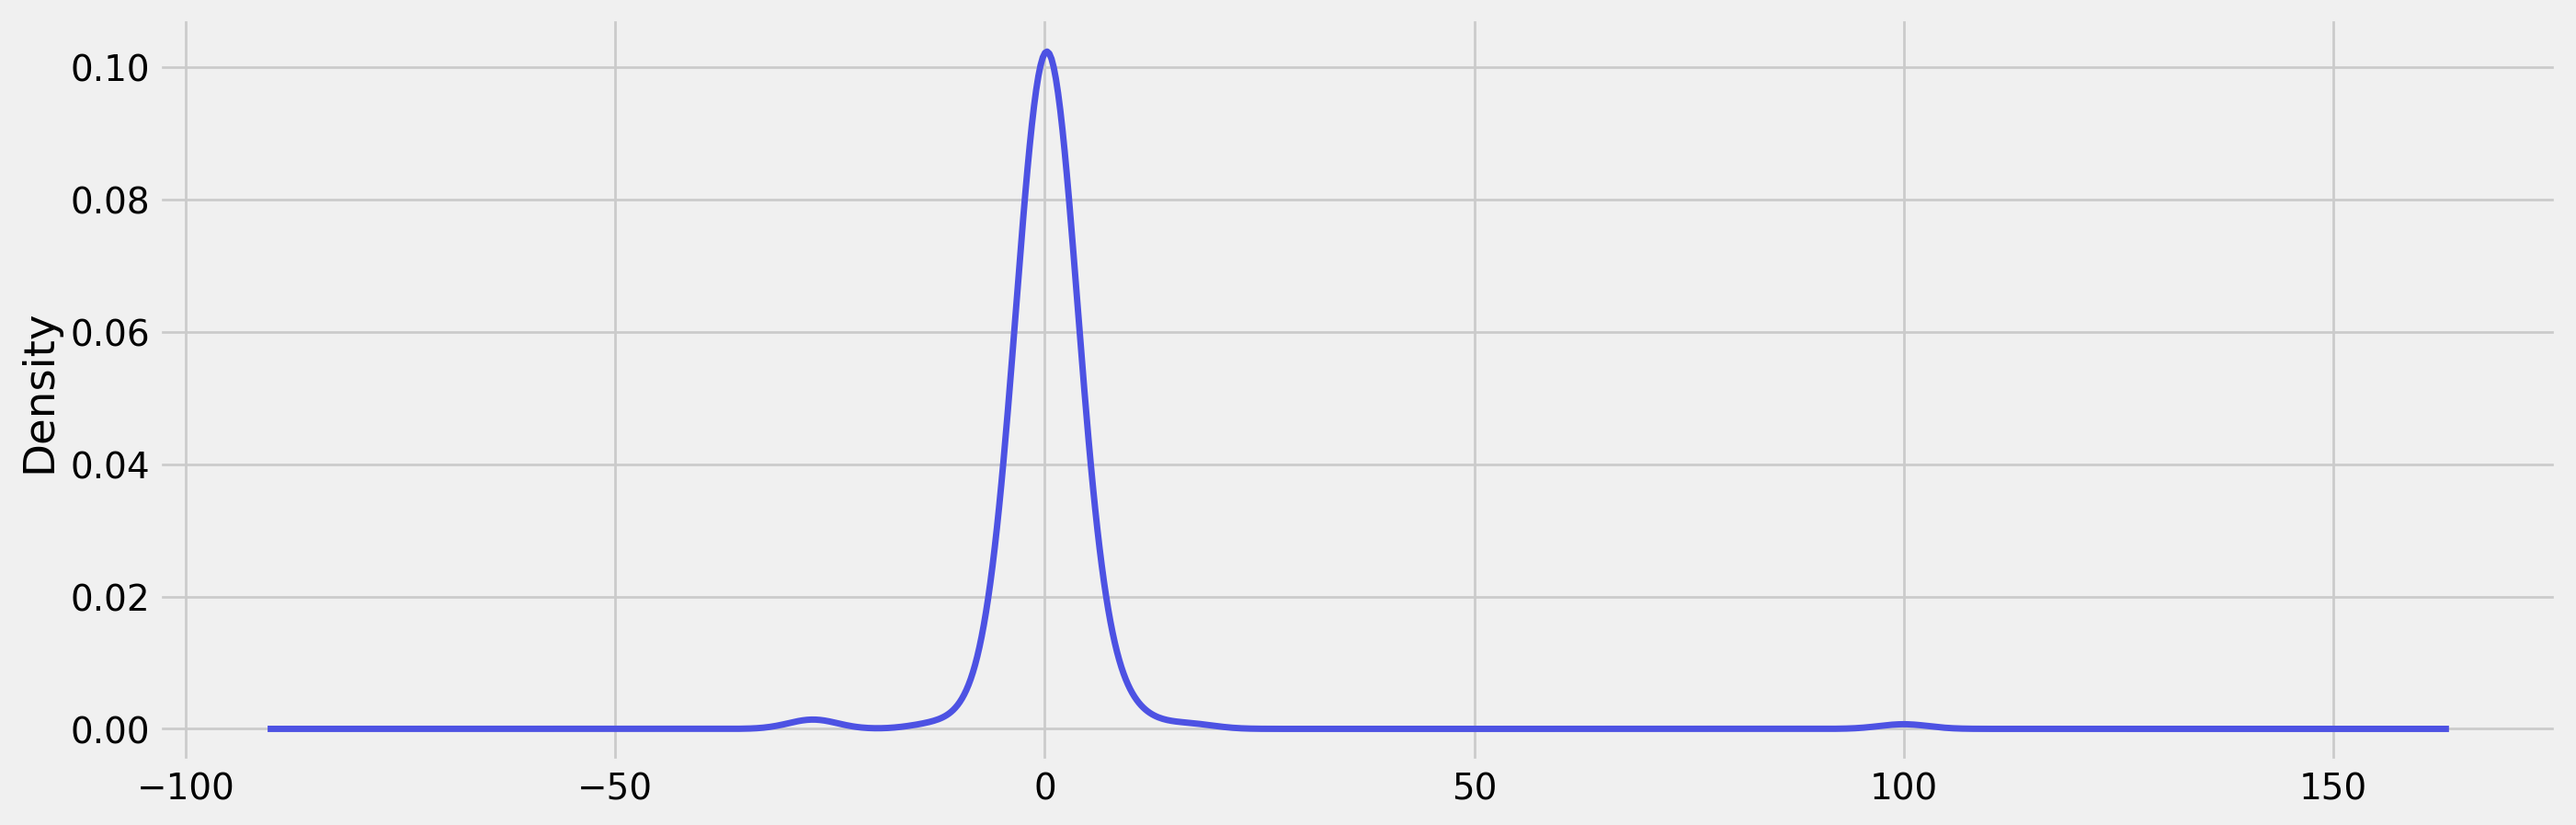

In [40]:
diet_results1.resid.plot(kind= "kde");

In [41]:
df_diet["SARIMAX forecast"] = diet_results1.predict(start =200, end = 221)

In [42]:
df_diet.columns

Index(['diet search', 'Diet First difference', 'Diet Seasonal Difference',
       'Diet Seasonal First Difference', 'ARIMA forecast', 'SARIMAX forecast'],
      dtype='object')

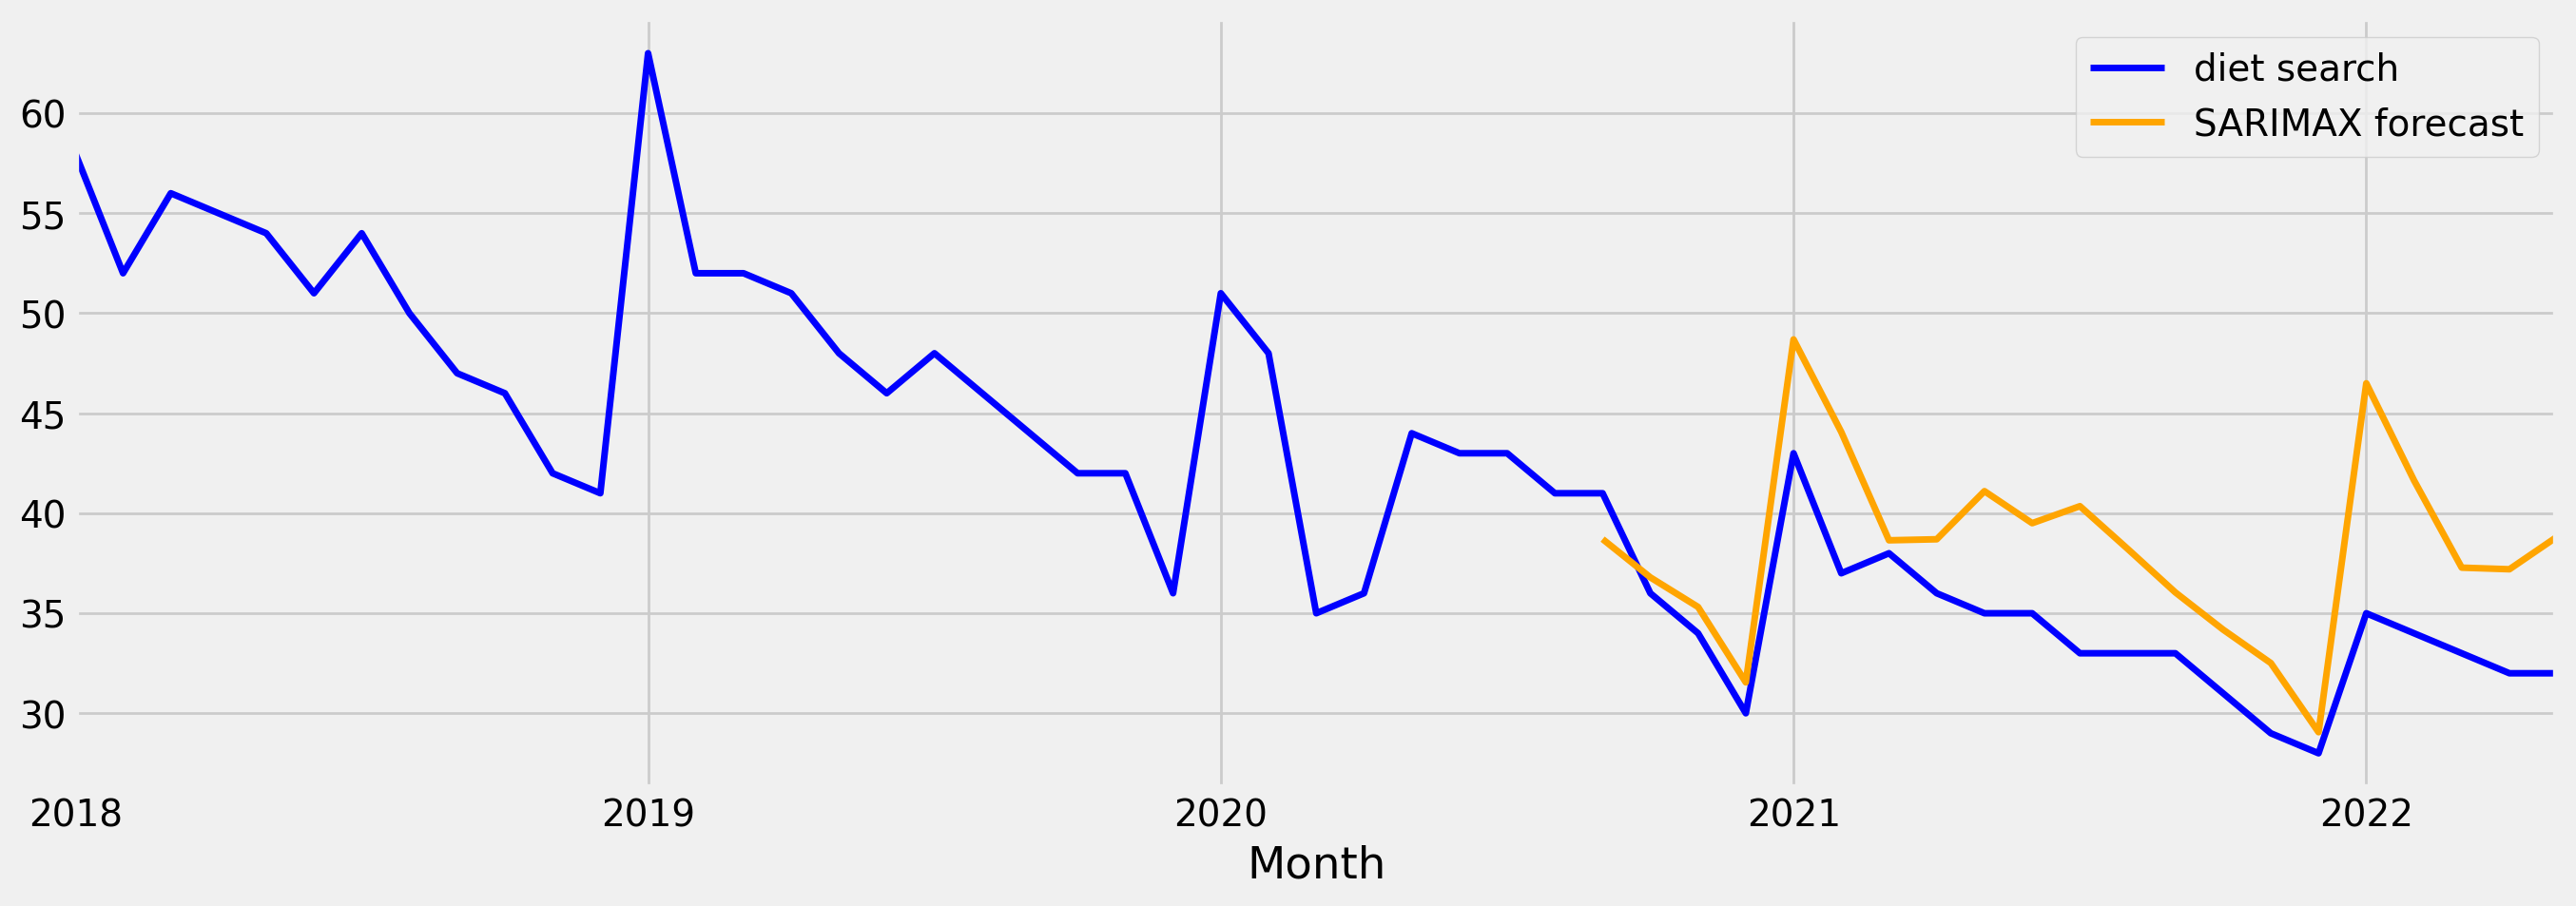

In [43]:
df_diet[['diet search', 'SARIMAX forecast']].loc["2018":].plot(color= ["b", "orange"]);

## Fitting Order of the SARIMAX using auto_arima

- Here using AIC minimization (BIC is not showing though)
- ACF and PACF can be used 
- error reduction via rms technique (out of scope)

In [44]:
import pmdarima

In [45]:
from pmdarima import auto_arima
auto_arima(df_diet['diet search'][:200], m= 12,start_p =0, max_p= 5,start_q=0,max_q =5, d=1,
           start_P=0,max_P =5,trace = True,start_Q=0, max_D =5, D=1,
           error_action = "ignore", suppress_warning = True, stepwise =True, seasonal = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=984.512, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=966.466, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=948.289, Time=0.12 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=973.420, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=949.534, Time=0.20 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=949.316, Time=0.30 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=960.333, Time=0.07 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=951.198, Time=0.62 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=955.258, Time=0.09 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=948.406, Time=0.21 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=947.053, Time=0.15 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=970.532, Time=0.05 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=947.853, Time=0.26 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=947.320, Time=0.43 sec
 ARIMA(0,1,2)(1,1,0)[12]         

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [46]:
#unable to see BIC parameters

In [47]:
diet_model2 = sm.tsa.statespace.SARIMAX(df_diet['diet search'][:200], order = (1,1,3),
                                       seasonal_order = (0,1,1,12) )

C:\Users\prita\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\prita\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [48]:
diet_results2 = diet_model2.fit()
print(diet_results2.summary())

                                      SARIMAX Results                                       
Dep. Variable:                          diet search   No. Observations:                  200
Model:             SARIMAX(1, 1, 3)x(0, 1, [1], 12)   Log Likelihood                -465.061
Date:                              Thu, 02 Jun 2022   AIC                            942.122
Time:                                      18:21:14   BIC                            961.509
Sample:                                  01-01-2004   HQIC                           949.977
                                       - 08-01-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9795      0.019     51.485      0.000       0.942       1.017
ma.L1         -1.28

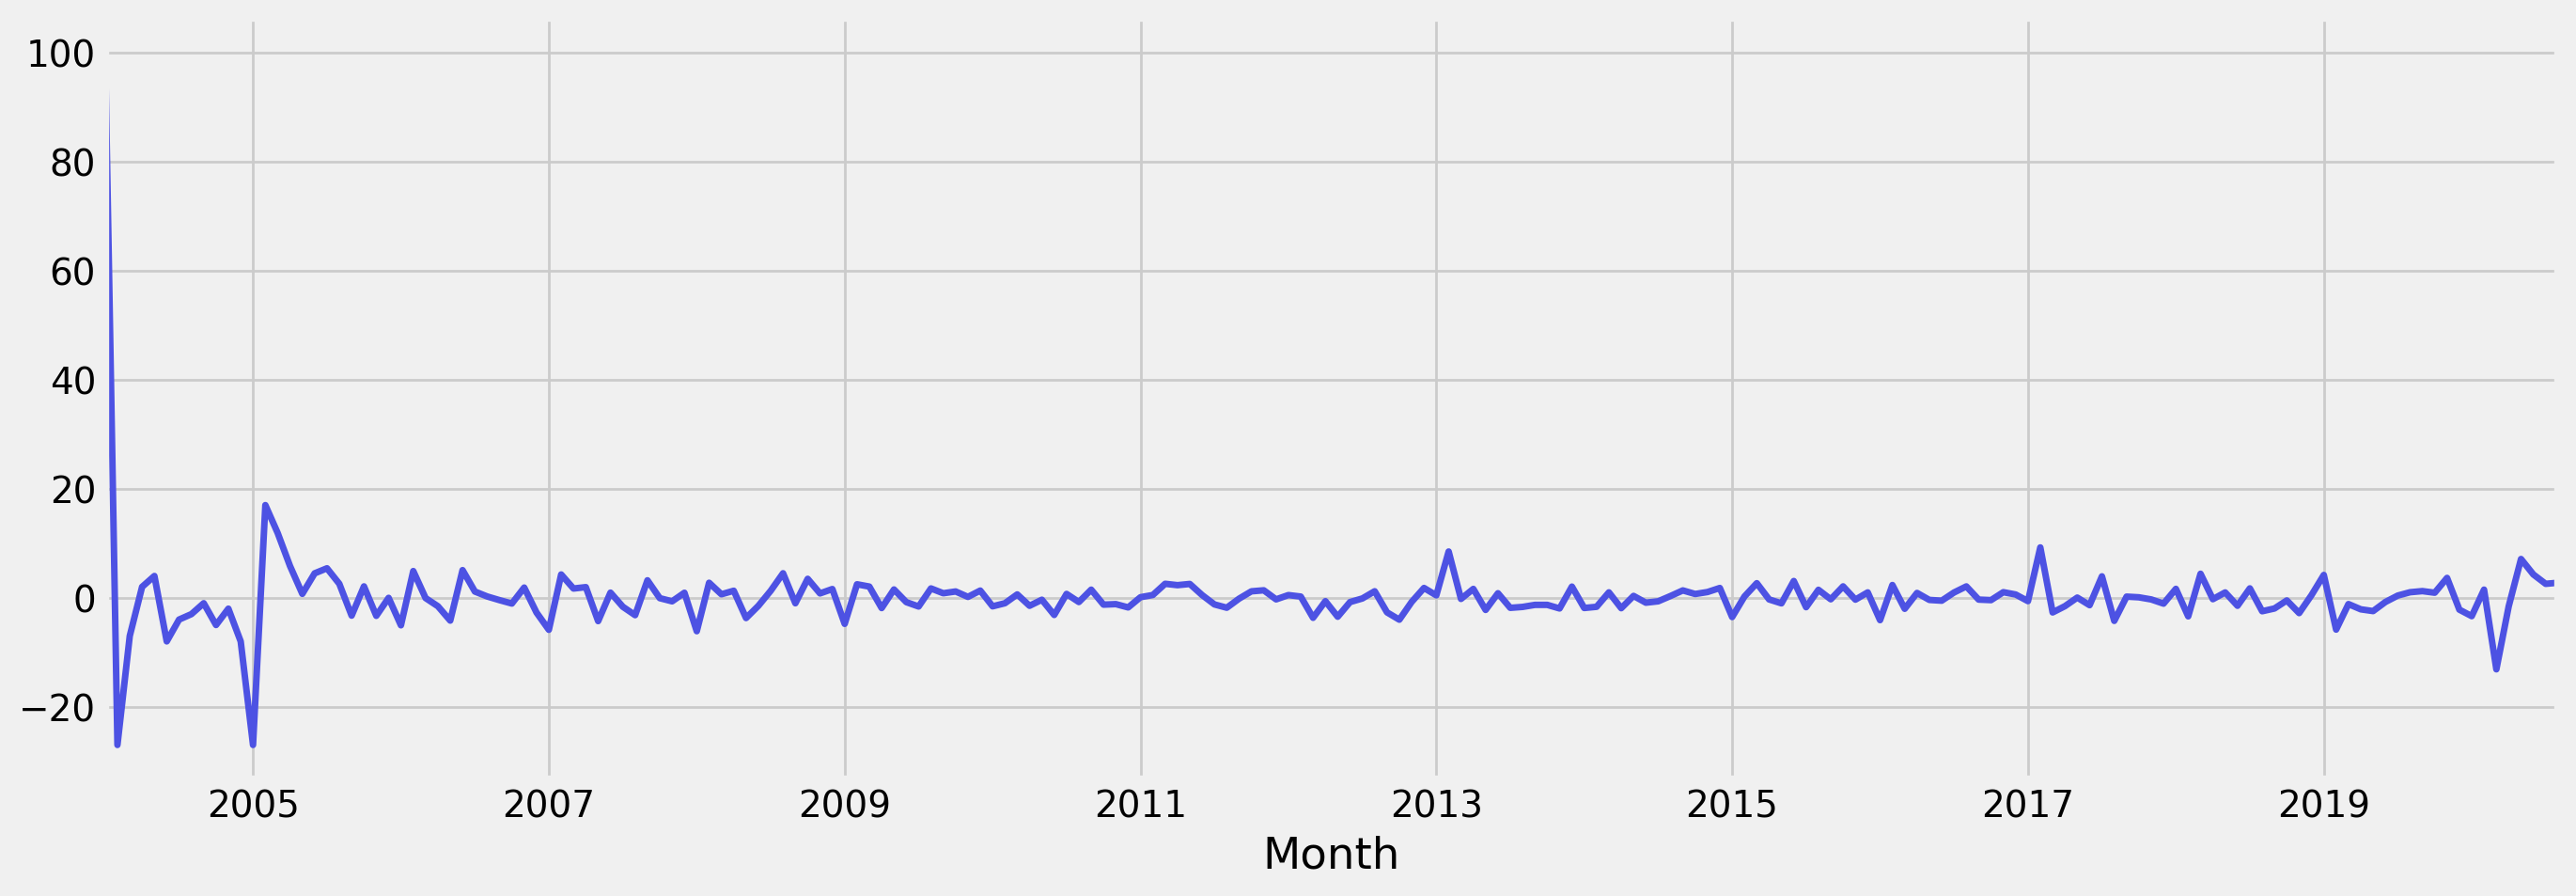

In [49]:
diet_results2.resid.plot();

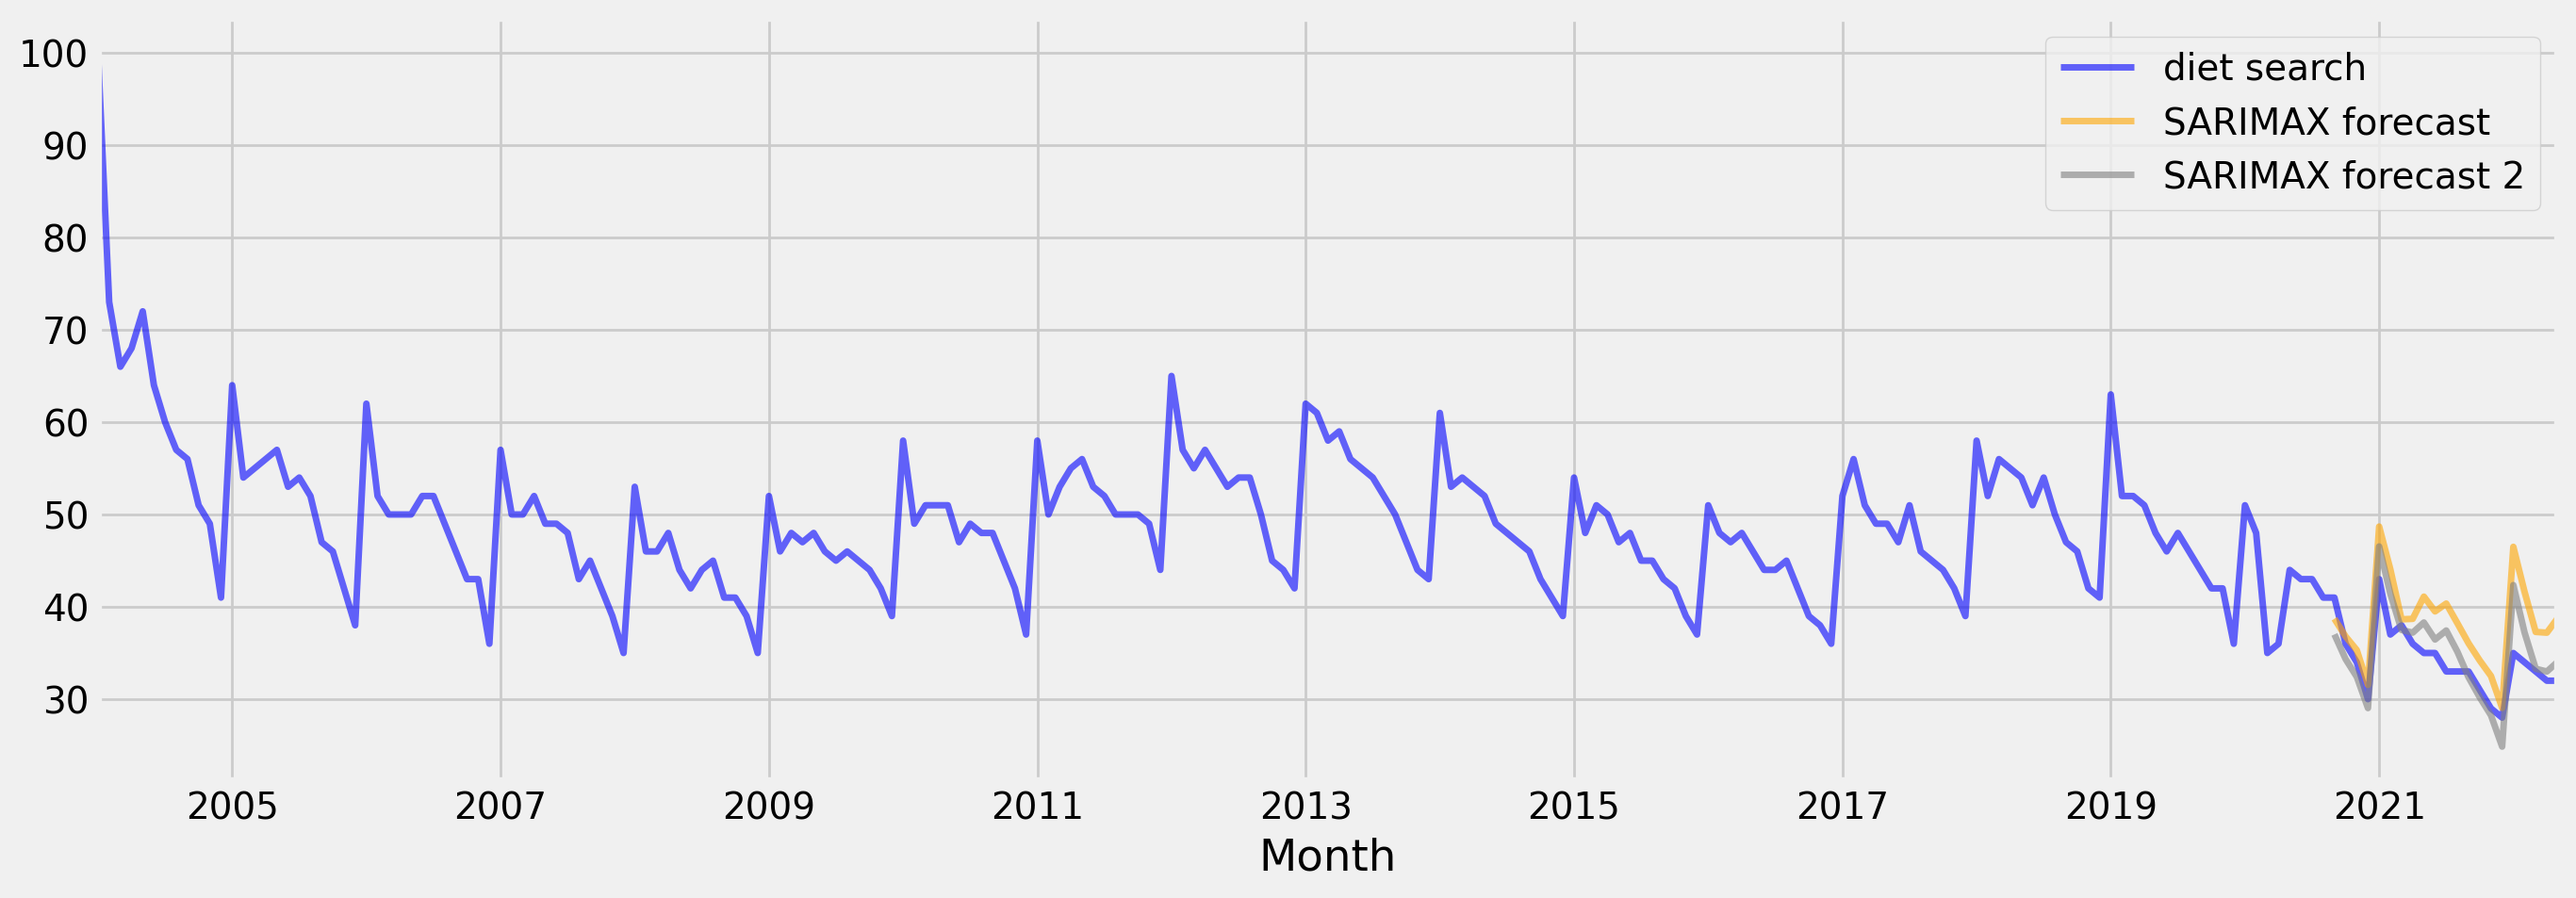

In [50]:
df_diet["SARIMAX forecast 2"] = diet_results2.predict(start =200, end = 221)
df_diet[['diet search',"SARIMAX forecast", 'SARIMAX forecast 2']].plot(color= ["b", "orange","grey"], alpha =0.6)
plt.legend();

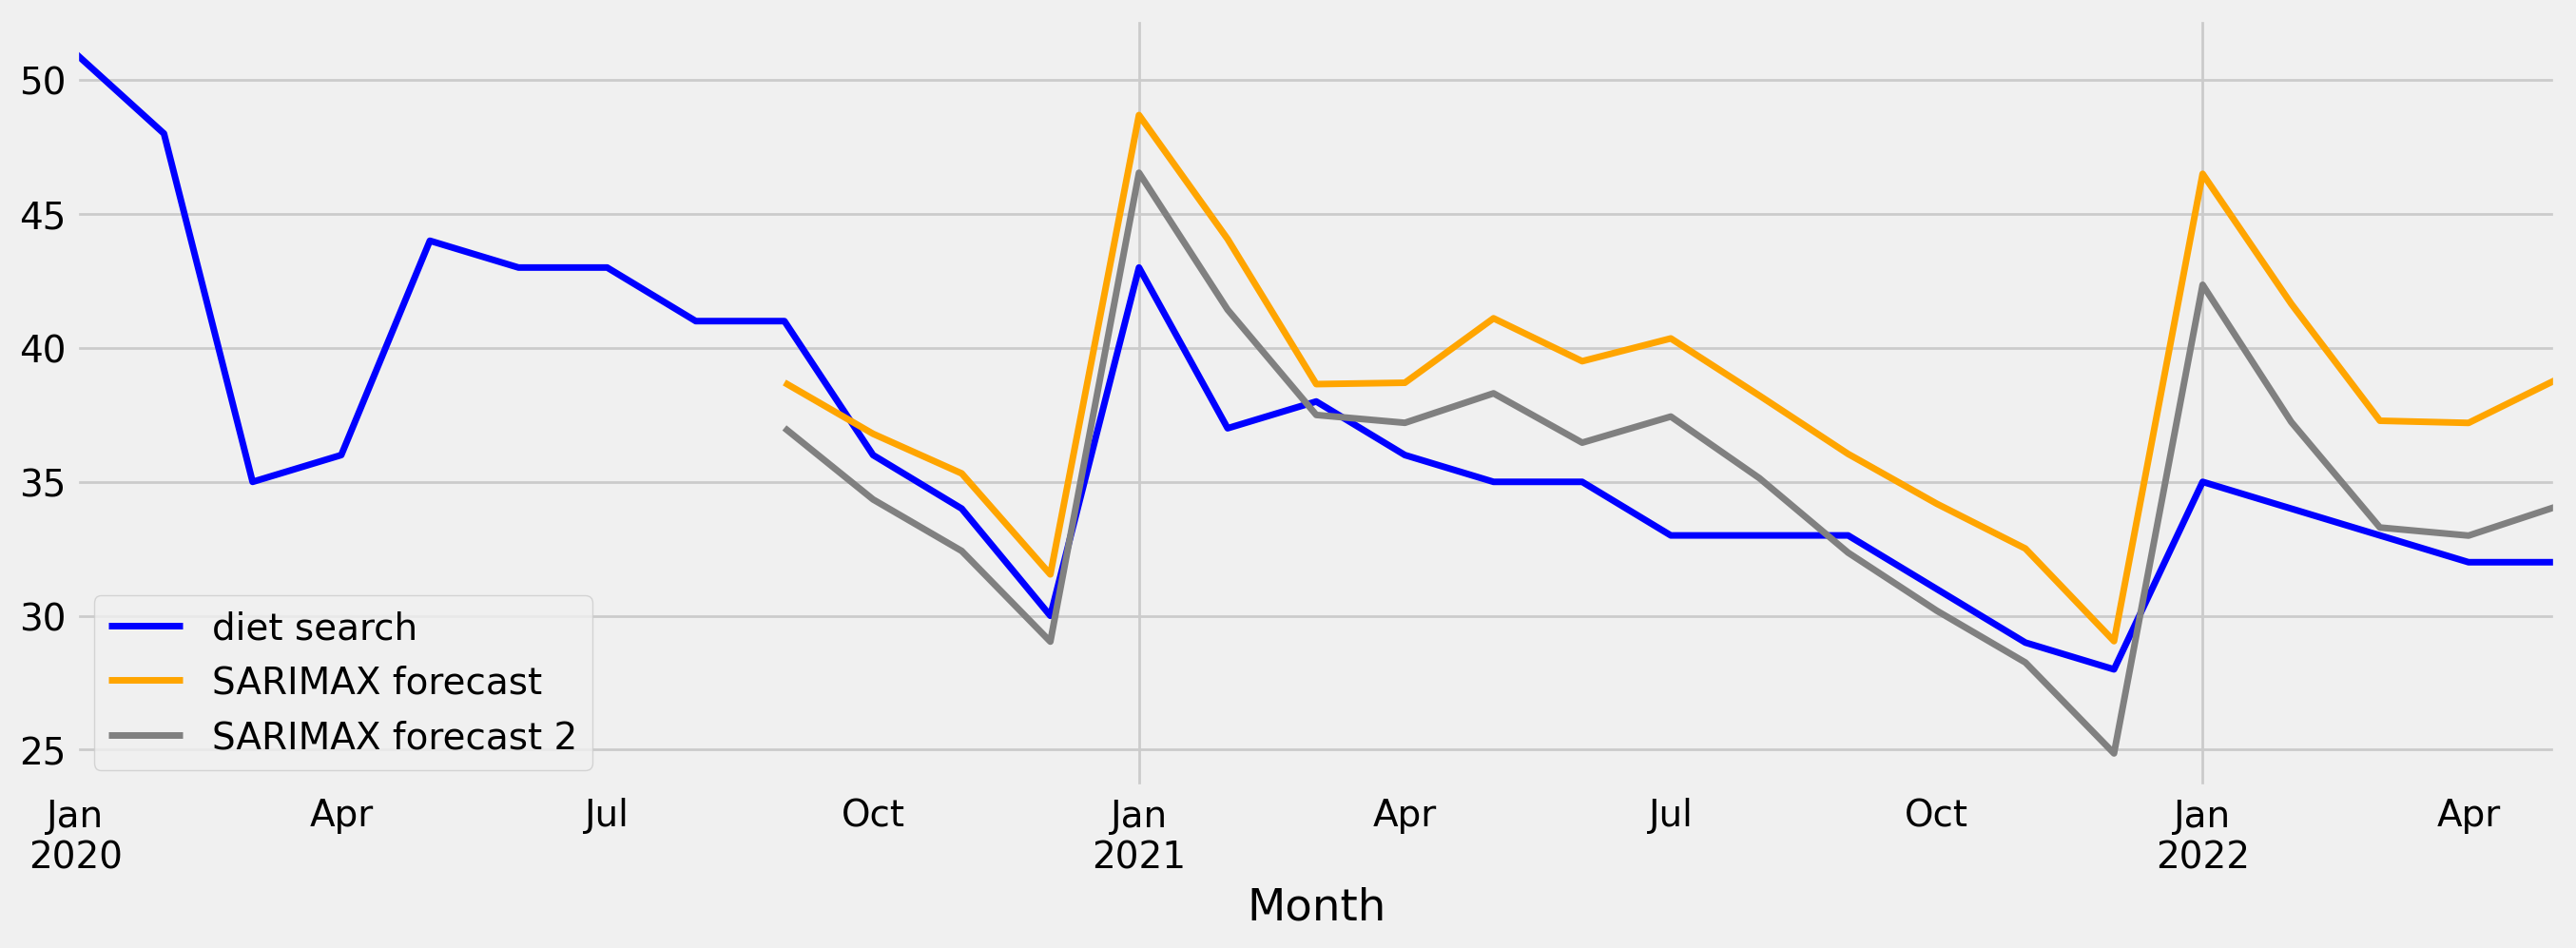

In [51]:
df_diet[['diet search',"SARIMAX forecast", 'SARIMAX forecast 2']].loc["2020":].plot(color= ["b", "orange","grey"])
plt.legend();

In [52]:
df_diet[['diet search',"SARIMAX forecast", 'SARIMAX forecast 2']].loc["2021":]

,diet search,SARIMAX forecast,SARIMAX forecast 2
Month,,,
2021-01-01,43,48.691277,46.538692
2021-02-01,37,44.063163,41.426249
2021-03-01,38,38.648001,37.496879
2021-04-01,36,38.699403,37.203711
2021-05-01,35,41.104792,38.304525
2021-06-01,35,39.503770,36.462668
2021-07-01,33,40.353691,37.437199
2021-08-01,33,38.219041,35.136033
2021-09-01,33,36.042747,32.357202


### BUILDING FORECAST FOR NEXT 24 months

In [53]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_diet.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [54]:
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=df_diet.columns)

In [55]:
future_df=pd.concat([df_diet,future_dates_df])

In [56]:
len(future_df)

244

In [57]:
diet_model_final = sm.tsa.statespace.SARIMAX(df_diet['diet search'],order = (1,1,3),
                                       seasonal_order = (0,1,1,12))
diet_results_final = diet_model_final.fit()

C:\Users\prita\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\prita\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [58]:
future_df["SARIMAX forecast final"] = diet_results_final.predict(start =221, end = 244,dynamic = True)

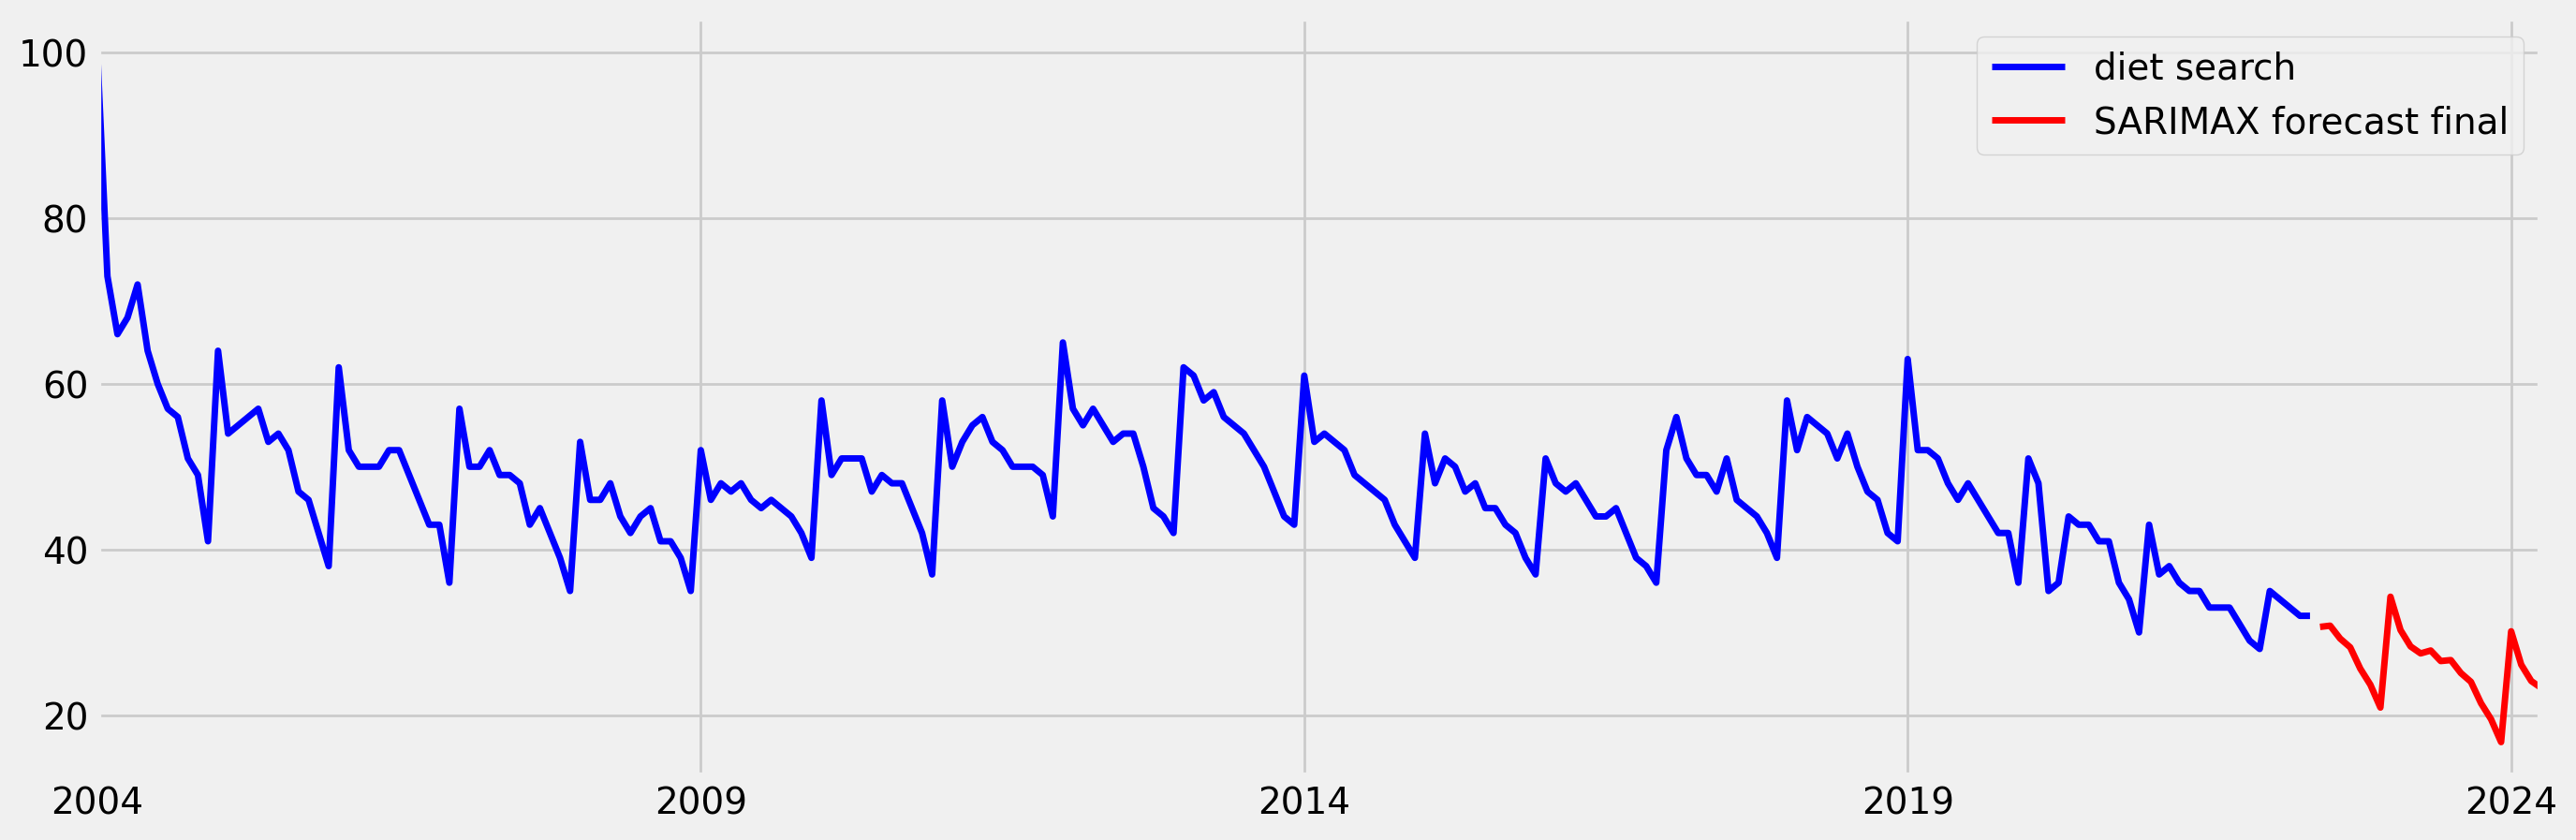

In [59]:
future_df[['diet search','SARIMAX forecast final']].plot(color =["b","r"]);